In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy
import seaborn as sns
mpl.rcParams['figure.dpi']= 300

/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
base_swflow= pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_mullFlow_2017toMay_5m_utc_gpm.csv',
                         index_col = 0, names=['time_utc', 'flow'])
base_swSWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_mullSWT_2017toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_swRWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_mullRWT_2017toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_oatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_OAT_2017toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_solarGlob = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/csl_solarGlob_2017toMay_5m_utc_wpm2.csv',
                         index_col = 0, names=['time_utc', 'solarRad'])
base_iatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_IAT_2017FebtoMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_wsRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_WS_2017FebtoMay_5m_utc_mph.csv',
                         index_col = 0, names=['time_utc', 'ws'])



rl_swflow= pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/iw_mullFlow_2018Feb6toMay_5m_utc_gpm.csv',
                         index_col = 0, names=['time_utc', 'flow'])
rl_swSWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/iw_mullSWT_2018Feb6toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
rl_swRWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/iw_mullRWT_2018Feb6toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
rl_oatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/csl_OAT_2018Feb6toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
rl_solarGlob = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/csl_solarGlob_2018Feb6toMay_5m_utc_wpm2.csv',
                         index_col = 0, names=['time_utc', 'solarRad'])
rl_iatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/iw_iat_2018Feb6toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
rl_wsRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/iw_WS_2018Feb6toMay_5m_utc_mph.csv',
                         index_col = 0, names=['time_utc', 'ws'])

base_1617_swflow= pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iw_mullFlow_201617Heating_5m_utc_gpm.csv',
                         index_col = 0, names=['time_utc', 'flow'])
base_1617_swSWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iw_mullSWT_201617Heating_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_1617_swRWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iw_mullRWT_201617Heating_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_1617_oatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iwcslCmbd_oat_201617Heating_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_1617_solarGlob = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/csl_solarGlob_201617Heating_5m_utc_wpm2.csv',
                         index_col = 0, names=['time_utc', 'solarRad'])
base_1617_iatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iw_iat_201617Heating_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_1617_wsRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iw_ws_201617Heating_5m_utc_mph.csv',
                         index_col = 0, names=['time_utc', 'ws'])

base_2017_oatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/csliwCmbd_OAT_2017to2018Jan_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])

dp = pd.DataFrame()

In [32]:
base_1617_oatRaw

,temp
time_utc,
2016-11-01T04:05:00Z,43.200000
2016-11-01T04:10:00Z,42.733345
2016-11-01T04:15:00Z,42.883320
2016-11-01T04:20:00Z,42.716682
2016-11-01T04:25:00Z,43.000000
2016-11-01T04:30:00Z,42.849920
2016-11-01T04:35:00Z,42.383278
2016-11-01T04:40:00Z,42.116680
2016-11-01T04:45:00Z,42.316708


In [3]:
def getHeatingEnergy(swflow, swt, rwt, min_int = 1):
    htEnergyDf = pd.DataFrame();
    htEnergyDf['energy'] = 4.187 * swflow['flow'] * 0.06309020 * ((swt['temp'] - 32)/1.8 - (rwt['temp']-32)/1.8) * (min_int/60.0)
    htEnergyDf[htEnergyDf < 0] = 0
    timeIdx = pd.to_datetime(htEnergyDf.index).tz_localize('utc').tz_convert('US/Eastern')
    htEnergyDf.set_index(timeIdx, inplace = True)
    return htEnergyDf;

def getOAT(oatRaw):
    oat = pd.DataFrame();
    oat['temp'] = (oatRaw['temp'] - 32.0)/1.8
    timeIdx = pd.to_datetime(oat.index).tz_localize('utc').tz_convert('US/Eastern')
    oat.set_index(timeIdx, inplace = True)
    return oat;

def getWS(wsRaw):
    ws = pd.DataFrame();
    ws['ws'] = wsRaw['ws'] * 0.44704
    timeIdx = pd.to_datetime(ws.index).tz_localize('utc').tz_convert('US/Eastern')
    ws.set_index(timeIdx, inplace = True)
    return ws;

def getSolarGlob(solarGlobRaw):
    solarGlob = pd.DataFrame();
    solarGlob['solarRad'] = solarGlobRaw['solarRad']
    timeIdx = pd.to_datetime(solarGlob.index).tz_localize('utc').tz_convert('US/Eastern')
    solarGlob.set_index(timeIdx, inplace = True)
    return solarGlob;
    

In [4]:
base_energy = getHeatingEnergy(base_swflow, base_swSWT, base_swRWT, 5)
rl_energy = getHeatingEnergy(rl_swflow, rl_swSWT, rl_swRWT, 5)
base_oat = getOAT(base_oatRaw)
rl_oat = getOAT(rl_oatRaw)
base_solarGlob = getSolarGlob(base_solarGlob)
rl_solarGlob = getSolarGlob(rl_solarGlob)
base_iat = getOAT(base_iatRaw)
rl_iat = getOAT(rl_iatRaw)
base_ws = getWS(base_wsRaw)
rl_ws = getWS(rl_wsRaw)

base_2017_oat = getOAT(base_2017_oatRaw)

base_1617_energy = getHeatingEnergy(base_1617_swflow, base_1617_swSWT, base_1617_swRWT, 5)
base_1617_oat = getOAT(base_1617_oatRaw)
base_1617_solarGlob = getSolarGlob(base_1617_solarGlob)
base_1617_iat = getOAT(base_1617_iatRaw)
base_1617_ws = getWS(base_1617_wsRaw)



In [5]:
base_1617_all = pd.concat([base_1617_oat, base_1617_solarGlob, base_1617_ws, base_1617_iat, base_1617_energy], axis=1)

In [6]:
base_1617_all_list = [base_1617_oat, base_1617_solarGlob, base_1617_ws, base_1617_iat, base_1617_energy]
base_1617_all_aggList = [];
for i in range(len(base_1617_all_list)):
    aggDf = pd.DataFrame();
    orgDf = base_1617_all_list[i]
    colName = orgDf.columns.values[0]
    if i < len(base_1617_all_list) - 1:
        aggDf[colName] = orgDf[colName].resample('D').mean()
    else:
        aggDf[colName] = orgDf[colName].resample('D').sum()
    base_1617_all_aggList.append(aggDf)


In [7]:
train_rdm_choice_idx_bk = train_rdm_choice_idx

NameError: name 'train_rdm_choice_idx' is not defined

In [8]:
base_1617_all_agg = pd.concat(base_1617_all_aggList, axis=1)
base_1617_all_agg.columns = ['oat', 'solarGlob', 'ws', 'iat', 'energy']
base_1617_all_agg['month'] =  base_1617_all_agg.index.month
base_1617_all_agg['weekday'] =  base_1617_all_agg.index.weekday
base_1617_all_agg['weekdayType'] = base_1617_all_agg.index.weekday
base_1617_all_agg.loc[base_1617_all_agg['weekday'] > 4, 'weekdayType'] = 0
base_1617_all_agg.loc[base_1617_all_agg['weekday'] <= 4, 'weekdayType'] = 1
base_1617_weekday_agg = base_1617_all_agg.loc[(base_1617_all_agg["weekday"] < 7) &
                                            ((base_1617_all_agg["month"] < 5) |
                                            (base_1617_all_agg["month"] > 10)) &
                                             (base_1617_all_agg["energy"] > 40)]
base_1617_total_x = base_1617_weekday_agg[['oat','solarGlob','iat']].as_matrix()
base_1617_total_y = base_1617_weekday_agg[['energy']].as_matrix()



/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [16]:
train_rdm_choice_idx = np.loadtxt('train_rdm_choice_idx.csv')
train_rdm_choice_idx = train_rdm_choice_idx.astype(int)

In [17]:
train_rdm_choice_idx

array([263, 214,  90, 266, 176, 158,  83, 328, 227, 271, 143, 209, 251,
        93, 222, 171,   2,  23,  18,  53, 119,  72, 205, 302, 110, 199,
       225,  68, 181, 211, 168,   8, 108, 184,  74, 115, 319, 313, 109,
        34, 193,  80, 257,  48, 351, 127, 232, 240, 307, 188, 261,  94,
       120, 159, 306, 102, 215,  17, 298, 244, 297,  98, 352, 256, 267,
       138, 194, 350, 197, 285, 235, 294,  47,  56, 185, 330, 277, 169,
        85, 224, 140, 331, 346, 284, 337, 317, 125, 304, 303, 316,  62,
        31, 288, 332, 341, 189, 219, 121, 105, 208, 234, 117, 223, 203,
        64,  89, 315, 259, 347, 281,  26, 292, 296,  40, 135,  76, 325,
       139, 260, 129, 295, 275, 231,  10, 210, 312, 204, 118,  35, 212,
       262,  33, 162, 153,   1, 165, 174,  21, 221, 343, 265, 322,  69,
       150,  27, 186, 345,  24,  65,  63, 268, 342,  54,  52, 147, 274,
        37, 323,  22,  30, 155, 220,  60, 344, 114,  84,  50, 348, 163,
        79, 177, 279,  67, 290, 106, 272, 229,  59,   9, 170, 16

In [19]:

# Get subset for train and test

base_1617_train_x = base_1617_total_x[train_rdm_choice_idx, :]
base_1617_train_y = base_1617_total_y[train_rdm_choice_idx, :]
base_1617_test_x = np.delete(base_1617_total_x, train_rdm_choice_idx, axis = 0)
base_1617_test_y = np.delete(base_1617_total_y, train_rdm_choice_idx, axis = 0)

# Normalize x y
from sklearn.preprocessing import StandardScaler
std_scaler_x = StandardScaler()
std_scaler_y = StandardScaler()
base_1617_train_x = std_scaler_x.fit_transform(base_1617_train_x)
base_1617_train_y = std_scaler_y.fit_transform(base_1617_train_y)
base_1617_test_x = std_scaler_x.transform(base_1617_test_x)
base_1617_test_y = std_scaler_y.transform(base_1617_test_y)

/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [20]:
# Gaussian training
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, DotProduct, RationalQuadratic, WhiteKernel, Matern, ExpSineSquared

# K fold cv
from sklearn.model_selection import KFold

def get_kfold_res (k, rg, x, y):
    kf = KFold(n_splits=k)
    res_score = 0;
    for train_index, valid_index in kf.split(x):
        X_train, X_valid = x[train_index, :], x[valid_index, :]
        y_train, y_valid = y[train_index, :], y[valid_index, :]
        rg.fit(X_train, y_train)
        res_score += rg.score(X_valid, y_valid);
    return res_score/k



gp_kernel_mtd = RationalQuadratic
gp_kernel = gp_kernel_mtd(0.1, 0.5)
rg = GaussianProcessRegressor(kernel=gp_kernel, alpha=1e-10, normalize_y=True, n_restarts_optimizer = 10)
#rg = BayesianRidge()
#rg = MLPRegressor()
rg.fit(base_1617_train_x, base_1617_train_y)
#for train_index, test_index in kf.split(base_1617_train_x):
#    print (train_index, test_index)
y_pred, y_pred_std = rg.predict(base_1617_test_x, return_std=True)
y_pred = np.ravel(y_pred)
print (rg.score(base_1617_test_x, base_1617_test_y))

/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


0.9120591309981008


In [174]:
rg.log_marginal_likelihood_value_

-142.4660776189024

In [266]:
# Feature selection
import itertools
fea_index = [0, 1, 2, 3, 4] # 'oat','solarGlob', 'ws', 'iat', 'weekdayType'
feaSelec_foldK = 10
feaSelec_res = []
for feature_num in range(1, len(fea_index)):
    for feature_idx_choice in itertools.combinations(fea_index, feature_num):
        feaSelec_trainX_this = base_1617_train_x[:, list(feature_idx_choice)];
        res_score = get_kfold_res (feaSelec_foldK, rg, feaSelec_trainX_this, base_1617_train_y);
        print ('fea_index: ', feature_idx_choice)
        print ('kFold_score: ', res_score)
        feaSelec_res.append([feature_idx_choice, res_score])
allFeaRes = get_kfold_res (feaSelec_foldK, rg, base_1617_train_x, base_1617_train_y)
feaSelec_res.append([tuple(fea_index), res_score])

fea_index:  (0,)
kFold_score:  0.8367060961924448


/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.26488243e-03, 3.01045982e+03]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 42, 'warnflag': 2, 'nit': 1}
  " state: %s" % convergence_dict)


fea_index:  (1,)
kFold_score:  -0.09620816892302922


/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-58.6442714 ,   9.00247565]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 61, 'warnflag': 2, 'nit': 14}
  " state: %s" % convergence_dict)
/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-4.15233038,  1.79249067]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'warnflag': 2, 'nit': 0}
  " state: %s" % convergence_dict)
/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-6.87850767,  1.34483844]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 97, 'warnflag': 2, '

fea_index:  (2,)
kFold_score:  -0.06571771956845018
fea_index:  (3,)
kFold_score:  0.26253137521873005


/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([   6144., -983040.]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 28, 'warnflag': 2, 'nit': 1}
  " state: %s" % convergence_dict)
/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2496.,  1396.]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 44, 'warnflag': 2, 'nit': 1}
  " state: %s" % convergence_dict)
/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-9.97679606e-02,  3.80883179e+03]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 44, 'warnflag': 2, 'nit': 1}
  

fea_index:  (4,)
kFold_score:  -0.05234368703857402
fea_index:  (0, 1)
kFold_score:  0.8631508952680742
fea_index:  (0, 2)
kFold_score:  0.8334870006418514
fea_index:  (0, 3)
kFold_score:  0.857383325877733
fea_index:  (0, 4)
kFold_score:  0.827043229498444
fea_index:  (1, 2)
kFold_score:  0.04725761074907113
fea_index:  (1, 3)
kFold_score:  0.3287187757639861
fea_index:  (1, 4)
kFold_score:  -0.0019294884642763078
fea_index:  (2, 3)
kFold_score:  0.3168350095873443


/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-23.79034915,   4.03186149]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 82, 'warnflag': 2, 'nit': 15}
  " state: %s" % convergence_dict)
/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-16.39985283,   2.97022278]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 61, 'warnflag': 2, 'nit': 16}
  " state: %s" % convergence_dict)
/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-64.69895136,   9.12753607]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 72, 'warnflag':

fea_index:  (2, 4)
kFold_score:  -0.0574221407822858
fea_index:  (3, 4)
kFold_score:  0.2978307138993934
fea_index:  (0, 1, 2)
kFold_score:  0.8598328473332814
fea_index:  (0, 1, 3)
kFold_score:  0.8879742736896571
fea_index:  (0, 1, 4)
kFold_score:  0.8534126205668425
fea_index:  (0, 2, 3)
kFold_score:  0.8581903363117263
fea_index:  (0, 2, 4)
kFold_score:  0.8173522521783795
fea_index:  (0, 3, 4)
kFold_score:  0.8761303309407273
fea_index:  (1, 2, 3)
kFold_score:  0.3383564177193622
fea_index:  (1, 2, 4)
kFold_score:  0.044608043871189065
fea_index:  (1, 3, 4)
kFold_score:  0.3358536993013719
fea_index:  (2, 3, 4)
kFold_score:  0.29282028522419784
fea_index:  (0, 1, 2, 3)
kFold_score:  0.8931087521571917
fea_index:  (0, 1, 2, 4)
kFold_score:  0.8497913450975669
fea_index:  (0, 1, 3, 4)
kFold_score:  0.8854398277299417
fea_index:  (0, 2, 3, 4)
kFold_score:  0.8584811900252216
fea_index:  (1, 2, 3, 4)
kFold_score:  0.3451309027048354


In [55]:
feaSelec_res = np.array(feaSelec_res)
feaSelec_res_sort = feaSelec_res[(-feaSelec_res[:,1]).argsort(), :]
feaSelec_res_sort[:, 1].shape

NameError: name 'feaSelec_res' is not defined

In [21]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%.3f' % (height),
                ha='center', va='bottom', fontsize = 11)

In [22]:
firstn = 15
plt.figure(figsize=(10, 4))
x = range(0, firstn)
rect = plt.bar(x, feaSelec_res_sort[0:firstn, 1], align='center', color = 'blue',width = 0.5, 
        label = 'Observation')
plt.xticks(x, feaSelec_res_sort[0:firstn, 0], rotation='vertical', fontsize = 13)
plt.xlabel('Choice of Features', fontsize = 13)
plt.ylabel('Average $R^2$ from the 10-fold CV', fontsize = 13)
plt.tick_params(labelsize = 13)
plt.ylim(0.0, 1.0)
#plt.plot(x_plot, y_pred_org, '.b', linestyle = '--', markersize = 7, label = 'Prediction', linewidth = 1)
#plt.plot(x_plot, y_pred_org - 1.9600 * y_pred_org_std, '-b', alpha=0.2, linewidth = 1)
#plt.plot(x_plot, y_pred_org + 1.9600 * y_pred_org_std, '-b', alpha=0.2, linewidth = 1)
#plt.fill_between(x_plot, y_pred_org - 1.9600 * y_pred_org_std, 
#                 y_pred_org + 1.9600 * y_pred_org_std, color='b', alpha=0.2, label = '95% confidence interval')
#plt.xlabel('Data Index', fontsize = 13)
#plt.ylabel('Daily Heating Energy Consumption (kWh)', fontsize = 13)
#plt.tick_params(labelsize = 13)
#plt.legend(fontsize = 10, loc="best")
#
autolabel(rect)

NameError: name 'feaSelec_res_sort' is not defined

<Figure size 720x288 with 0 Axes>

In [310]:
# Model selection
import itertools
l_choices = [0.1, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0]
alpha_choices = [0.1, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0]
gp_kernel_mtd = RationalQuadratic
modSelec_res = []
modSelec_foldK = 10

for l_choice in l_choices:
    for alpha_choice in alpha_choices:
        gp_kernel = gp_kernel_mtd(l_choice, alpha_choice)
        rg = GaussianProcessRegressor(kernel=gp_kernel, alpha=1e-8, normalize_y=True, n_restarts_optimizer = 10)
        res_score = get_kfold_res (modSelec_foldK, rg, base_1617_train_x, base_1617_train_y);
        print ('l_choice: ', l_choice)
        print ('alpha_choices: ', alpha_choice)
        print ('res_score', res_score)
        modSelec_res.append([(l_choice, alpha_choice), res_score])

l_choice:  0.1
alpha_choices:  0.1
res_score 0.8860611333684171
l_choice:  0.1
alpha_choices:  0.5
res_score 0.8860611331169042
l_choice:  0.1
alpha_choices:  1.0
res_score 0.8860611329171357


KeyboardInterrupt: 

In [23]:
y_pred_org = std_scaler_y.inverse_transform(y_pred) 
y_pred_org_std = std_scaler_y.inverse_transform(y_pred_std) - std_scaler_y.mean_

In [24]:
y_pred_org_std

array([ 82.84832886,  79.03063234,  98.86771768,  75.28943763,
       101.00298663,  94.16253932,  35.08010077,  73.10118561,
        93.88197622,  90.45424944,  84.11030729, 116.89977386,
        79.9462198 , 114.43478747, 121.33176238, 111.16770851,
       109.82509443, 138.84976616, 111.48974082,  99.83961726,
       101.51242439, 125.01216169, 131.85841829, 131.82916271,
       161.6161056 , 131.59231296, 114.89843827,  78.84218934,
       115.14198245, 104.48099456,  84.84170853, 119.08987233,
       102.92870761,  94.08025738,  67.76463191,  69.15703367,
       110.80789019, 102.10058091,  74.30073352, 105.69545295,
       114.54407611,  92.43731907,  98.75802765,  85.11211184,
        88.75490814,  81.14928332, 105.37343354, 113.35527114,
       109.23613328, 126.91470436, 115.84817339, 113.31061216,
        57.36492966, 125.76183394, 113.96661885, 104.73717888,
       132.24683789, 117.13010469, 101.73728373, 121.44044709,
        91.09412645,  82.78852051, 102.04043157, 119.30

In [25]:
base_energy = base_energy[base_energy.index.month > 1]
base_energy = base_energy[base_energy.index.month < 5]
base_oat = base_oat[base_oat.index.month > 1]
base_oat = base_oat[base_oat.index.month < 5]
base_solarGlob = base_solarGlob[base_solarGlob.index.month > 1]
base_solarGlob = base_solarGlob[base_solarGlob.index.month < 5]

rl_energy = rl_energy[rl_energy.index.month < 5]
rl_oat = rl_oat[rl_oat.index.month < 5]
rl_solarGlob = rl_solarGlob[rl_solarGlob.index.month < 5]
rl_iat = rl_iat[rl_iat.index.month < 5]

(-199, 1500)

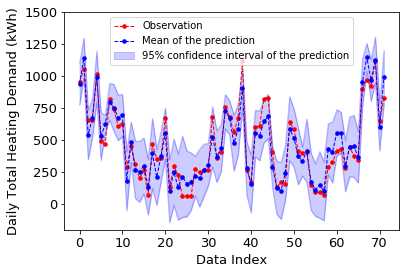

In [26]:

x_plot = np.array(range(72))
#plt.plot(x_plot, std_scaler_y.inverse_transform(base_1617_test_y), 'o', color = 'red')
plt.plot(x_plot, std_scaler_y.inverse_transform(base_1617_test_y), 'red', marker = '.', linestyle = '--', markersize = 7,
        label = 'Observation', linewidth = 1)
plt.plot(x_plot, y_pred_org, 'blue', marker = '.', linestyle = '--', markersize = 7, label = 'Mean of the prediction', linewidth = 1)
plt.plot(x_plot, y_pred_org - 1.9600 * y_pred_org_std, 'blue', alpha=0.2, linewidth = 1)
plt.plot(x_plot, y_pred_org + 1.9600 * y_pred_org_std, 'blue', alpha=0.2, linewidth = 1)
plt.fill_between(x_plot, y_pred_org - 1.9600 * y_pred_org_std, 
                 y_pred_org + 1.9600 * y_pred_org_std, color='b', alpha=0.2, label = '95% confidence interval of the prediction')
plt.xlabel('Data Index', fontsize = 13)
plt.ylabel('Daily Total Heating Demand (kWh)', fontsize = 13)
plt.tick_params(labelsize = 13)
plt.legend(fontsize = 10, loc="best")
plt.ylim(-199, 1500)

In [27]:
# Process rl_energy to account for fail of iw weather station
#for i in range(rl_energy.shape[0]):
#    if rl_oat['c'][i]>10.0 and rl_energy['kwh'][i] > 0.1:
#        rl_energy['kwh'][i] = 0.04
# Daily sum of energy (all)
base_energy_daily_all = pd.DataFrame();
base_energy_daily_all['energy'] = base_energy['energy'].resample('D').sum()
rl_energy_daily_all = pd.DataFrame();
rl_energy_daily_all['energy'] = rl_energy['energy'].resample('D').sum()
# Daily sum of energy (weekdays only)
base_energy_daily_weekdays = base_energy_daily_all[base_energy_daily_all.index.dayofweek < 5]
rl_energy_daily_weekdays = rl_energy_daily_all[rl_energy_daily_all.index.dayofweek < 5]
# Monthly daily average of energy
base_energy_monthly_daily_mean = pd.DataFrame();
base_energy_monthly_daily_mean['energy'] = base_energy_daily_all['energy'].resample('M').mean()
rl_energy_monthly_daily_mean = pd.DataFrame();
rl_energy_monthly_daily_mean['energy'] = rl_energy_daily_all['energy'].resample('M').mean()
# Daily average of oat (all)
base_oat_daily_all = pd.DataFrame();
base_oat_daily_all['temp'] = base_oat['temp'].resample('D').mean()
rl_oat_daily_all = pd.DataFrame();
rl_oat_daily_all['temp'] = rl_oat['temp'].resample('D').mean()

base_2017_oat_daily_all = pd.DataFrame();
base_2017_oat_daily_all['temp'] = base_2017_oat['temp'].resample('D').mean()
# Daily average of oat (weekdays only)
base_oat_daily_weekdays = base_oat_daily_all[base_oat_daily_all.index.dayofweek < 5]
rl_oat_daily_weekdays = rl_oat_daily_all[rl_oat_daily_all.index.dayofweek < 5]
# Monthly average of oat
base_oat_monthly_mean = pd.DataFrame();
base_oat_monthly_mean['temp'] = base_oat['temp'].resample('M').mean()
rl_oat_monthly_mean = pd.DataFrame();
rl_oat_monthly_mean['energy'] = rl_oat['temp'].resample('M').mean()
# Daily average of solar gloab (all)
base_solarGlob_daily_all = pd.DataFrame();
base_solarGlob_daily_all['solarRad'] = base_solarGlob['solarRad'].resample('D').mean()
rl_solarGlob_daily_all = pd.DataFrame();
rl_solarGlob_daily_all['solarRad'] = rl_solarGlob['solarRad'].resample('D').mean()

# Daily average of iat
base_iat_daily_all = pd.DataFrame();
base_iat_daily_all['temp'] = base_iat['temp'].resample('D').mean()
rl_iat_daily_all = pd.DataFrame();
rl_iat_daily_all['temp'] = rl_iat['temp'].resample('D').mean()

# Daily average of ws
base_ws_daily_all = pd.DataFrame();
base_ws_daily_all['ws'] = base_ws['ws'].resample('D').mean()
rl_ws_daily_all = pd.DataFrame();
rl_ws_daily_all['ws'] = rl_ws['ws'].resample('D').mean()

# Base daily average oat of feb 06-23
#base_oat_daily_interval = pd.DataFrame();
#base_oat_daily_interval['c'] = base_oat['c'].resample('D').mean()
#base_oat_daily_interval = base_oat_daily_interval[base_oat_daily_interval.index.month == 2]
#base_oat_daily_interval = base_oat_daily_interval[base_oat_daily_interval.index.day >= 6]
#base_oat_daily_interval = base_oat_daily_interval[base_oat_daily_interval.index.day <= 23]
# rl daily average oat of feb 06-23
#rl_oat_daily_all = pd.DataFrame();
#rl_oat_daily_all['c'] = rl_oat['c'].resample('D').mean()


/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


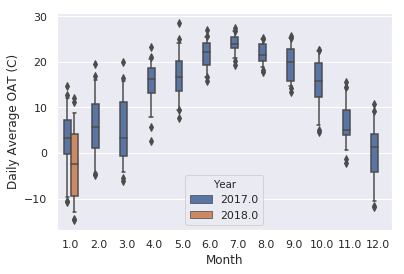

In [28]:
# base and rl oat
base_oat_daily_all_mat = [base_oat_daily_all['temp'].as_matrix(), base_oat_daily_all.index.month.values, 
                          base_oat_daily_all.index.year.values, base_oat_daily_all.index.weekday.values]
rl_oat_daily_all_mat = [rl_oat_daily_all['temp'].as_matrix(), rl_oat_daily_all.index.month.values, 
                        rl_oat_daily_all.index.year.values, rl_oat_daily_all.index.weekday.values]
cmbd_oat_daily_all_mat = [np.concatenate((base_oat_daily_all_mat[0], rl_oat_daily_all_mat[0])), 
                          np.concatenate((base_oat_daily_all_mat[1], rl_oat_daily_all_mat[1])),
                         np.concatenate((base_oat_daily_all_mat[2], rl_oat_daily_all_mat[2])),
                         np.concatenate((base_oat_daily_all_mat[3], rl_oat_daily_all_mat[3]))]
base_2017_oat_daily_all_mat = [base_2017_oat_daily_all['temp'].as_matrix(), base_2017_oat_daily_all.index.month.values, 
                          base_2017_oat_daily_all.index.year.values, base_2017_oat_daily_all.index.weekday.values]

cmbd_oat_daily_all_df = pd.DataFrame(np.array(cmbd_oat_daily_all_mat).T, columns = ['Daily Average OAT (C)', 'Month', 'Year', 'Weekday']);
cmbd_oat_daily_all_df.Month = cmbd_oat_daily_all_df.Month.astype(int)
cmbd_oat_daily_all_df.Year = cmbd_oat_daily_all_df.Year.astype(int)
cmbd_oat_daily_all_df.Weekday = cmbd_oat_daily_all_df.Weekday.astype(int)

cmbd_oat_daily_all_df.loc[cmbd_oat_daily_all_df['Year'] == 2017, 'Year'] = '2017 (RBC)'
cmbd_oat_daily_all_df.loc[cmbd_oat_daily_all_df['Year'] == 2018, 'Year'] = '2018 (RL)'

base_2017_oat_daily_all_df = pd.DataFrame(np.array(base_2017_oat_daily_all_mat).T, columns = ['Daily Average OAT (C)', 'Month', 'Year', 'Weekday']);

sns.set(font_scale=1)
#sns.violinplot(x = 'Month', y = 'Daily Average OAT (C)', hue = 'Year', data = cmbd_oat_daily_all_df
#            , palette = 'deep', width = 0.5, whis = [5, 95])

sns.boxplot(x = 'Month', y = 'Daily Average OAT (C)', hue = 'Year', data = base_2017_oat_daily_all_df
            , palette = 'deep', width = 0.5, whis = [5, 95])


In [29]:

base_2017_oat_sts = base_2017_oat_daily_all_df.groupby(
    [base_2017_oat_daily_all_df.Year, base_2017_oat_daily_all_df.Month]).agg(['mean', 'std'])

/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


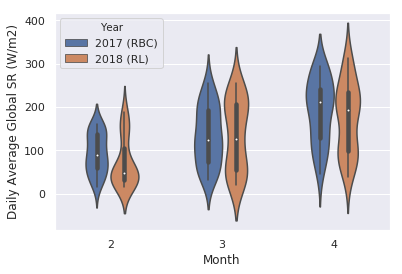

In [30]:
# base and rl solarGlob
base_solarGlob_daily_all_mat = [base_solarGlob_daily_all['solarRad'].as_matrix(), base_solarGlob_daily_all.index.month.values, 
                                base_solarGlob_daily_all.index.year.values, base_solarGlob_daily_all.index.weekday.values]
rl_solarGlob_daily_all_mat = [rl_solarGlob_daily_all['solarRad'].as_matrix(), rl_solarGlob_daily_all.index.month.values, 
                              rl_solarGlob_daily_all.index.year.values, rl_solarGlob_daily_all.index.weekday.values]
cmbd_solarGlob_daily_all_mat = [np.concatenate((base_solarGlob_daily_all_mat[0], rl_solarGlob_daily_all_mat[0])), 
                                np.concatenate((base_solarGlob_daily_all_mat[1], rl_solarGlob_daily_all_mat[1])),
                                np.concatenate((base_solarGlob_daily_all_mat[2], rl_solarGlob_daily_all_mat[2])),
                                np.concatenate((base_solarGlob_daily_all_mat[3], rl_solarGlob_daily_all_mat[3]))]

cmbd_solarGlob_daily_all_df = pd.DataFrame(np.array(cmbd_solarGlob_daily_all_mat).T, columns = ['Daily Average Global SR (W/m2)', 'Month', 'Year', 'Weekday']);
cmbd_solarGlob_daily_all_df.Month = cmbd_solarGlob_daily_all_df.Month.astype(int)
cmbd_solarGlob_daily_all_df.Year = cmbd_solarGlob_daily_all_df.Year.astype(int)

cmbd_solarGlob_daily_all_df.loc[cmbd_solarGlob_daily_all_df['Year'] == 2017, 'Year'] = '2017 (RBC)'
cmbd_solarGlob_daily_all_df.loc[cmbd_solarGlob_daily_all_df['Year'] == 2018, 'Year'] = '2018 (RL)'

sns.violinplot(x = 'Month', y = 'Daily Average Global SR (W/m2)', hue = 'Year', data = cmbd_solarGlob_daily_all_df
            , palette = 'deep', width = 0.5, whis = [5, 95])

/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


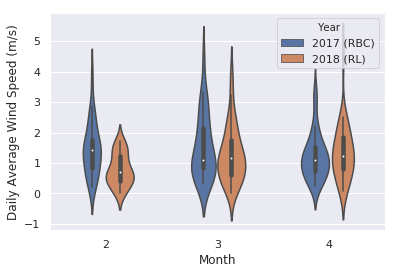

In [31]:
# base and rl ws
base_ws_daily_all_mat = [base_ws_daily_all['ws'].as_matrix(), base_ws_daily_all.index.month.values, 
                             base_ws_daily_all.index.year.values, base_ws_daily_all.index.weekday.values]
rl_ws_daily_all_mat = [rl_ws_daily_all['ws'].as_matrix(), rl_ws_daily_all.index.month.values, 
                           rl_ws_daily_all.index.year.values, rl_ws_daily_all.index.weekday.values]
cmbd_ws_daily_all_mat = [np.concatenate((base_ws_daily_all_mat[0], rl_ws_daily_all_mat[0])), 
                             np.concatenate((base_ws_daily_all_mat[1], rl_ws_daily_all_mat[1])),
                             np.concatenate((base_ws_daily_all_mat[2], rl_ws_daily_all_mat[2])),
                             np.concatenate((base_ws_daily_all_mat[3], rl_ws_daily_all_mat[3]))]

cmbd_ws_daily_all_df = pd.DataFrame(np.array(cmbd_ws_daily_all_mat).T, columns = ['Daily Average Wind Speed (m/s)', 
                                                                                          'Month', 'Year', 'Weekday']);
cmbd_ws_daily_all_df.Month = cmbd_ws_daily_all_df.Month.astype(int)
cmbd_ws_daily_all_df.Year = cmbd_ws_daily_all_df.Year.astype(int)

cmbd_ws_daily_all_df.loc[cmbd_ws_daily_all_df['Year'] == 2017, 'Year'] = '2017 (RBC)'
cmbd_ws_daily_all_df.loc[cmbd_ws_daily_all_df['Year'] == 2018, 'Year'] = '2018 (RL)'

sns.violinplot(x = 'Month', y = 'Daily Average Wind Speed (m/s)', hue = 'Year', data = cmbd_ws_daily_all_df
            , palette = 'deep', width = 0.5, whis = [5, 95])

/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


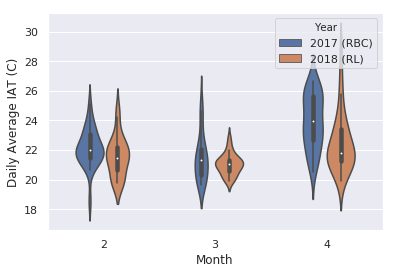

In [32]:
# base and rl iat
base_iat_daily_all_mat = [base_iat_daily_all['temp'].as_matrix(), base_iat_daily_all.index.month.values, 
                             base_iat_daily_all.index.year.values, base_iat_daily_all.index.weekday.values]
rl_iat_daily_all_mat = [rl_iat_daily_all['temp'].as_matrix(), rl_iat_daily_all.index.month.values, 
                           rl_iat_daily_all.index.year.values, rl_iat_daily_all.index.weekday.values]
cmbd_iat_daily_all_mat = [np.concatenate((base_iat_daily_all_mat[0], rl_iat_daily_all_mat[0])), 
                             np.concatenate((base_iat_daily_all_mat[1], rl_iat_daily_all_mat[1])),
                             np.concatenate((base_iat_daily_all_mat[2], rl_iat_daily_all_mat[2])),
                             np.concatenate((base_iat_daily_all_mat[3], rl_iat_daily_all_mat[3]))]

cmbd_iat_daily_all_df = pd.DataFrame(np.array(cmbd_iat_daily_all_mat).T, columns = ['Daily Average IAT (C)', 
                                                                                          'Month', 'Year', 'Weekday']);
cmbd_iat_daily_all_df.Month = cmbd_iat_daily_all_df.Month.astype(int)
cmbd_iat_daily_all_df.Year = cmbd_iat_daily_all_df.Year.astype(int)

cmbd_iat_daily_all_df.loc[cmbd_iat_daily_all_df['Year'] == 2017, 'Year'] = '2017 (RBC)'
cmbd_iat_daily_all_df.loc[cmbd_iat_daily_all_df['Year'] == 2018, 'Year'] = '2018 (RL)'

sns.violinplot(x = 'Month', y = 'Daily Average IAT (C)', hue = 'Year', data = cmbd_iat_daily_all_df
            , palette = 'deep', width = 0.5, whis = [5, 95])

/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


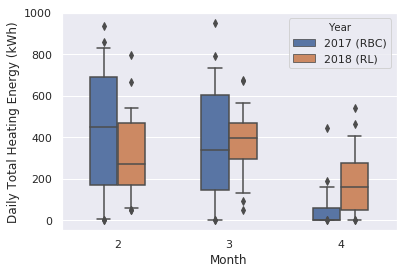

In [33]:
# base and rl energy
base_energy_daily_all_mat = [base_energy_daily_all['energy'].as_matrix(), base_energy_daily_all.index.month.values, 
                             base_energy_daily_all.index.year.values, base_energy_daily_all.index.weekday.values]
rl_energy_daily_all_mat = [rl_energy_daily_all['energy'].as_matrix(), rl_energy_daily_all.index.month.values, 
                           rl_energy_daily_all.index.year.values, rl_energy_daily_all.index.weekday.values]
cmbd_energy_daily_all_mat = [np.concatenate((base_energy_daily_all_mat[0], rl_energy_daily_all_mat[0])), 
                             np.concatenate((base_energy_daily_all_mat[1], rl_energy_daily_all_mat[1])),
                             np.concatenate((base_energy_daily_all_mat[2], rl_energy_daily_all_mat[2])),
                             np.concatenate((base_energy_daily_all_mat[3], rl_energy_daily_all_mat[3]))]

sns.set(font_scale=1.0)
cmbd_energy_daily_all_df = pd.DataFrame(np.array(cmbd_energy_daily_all_mat).T, columns = ['Daily Total Heating Energy (kWh)', 
                                                                                          'Month', 'Year', 'Weekday']);
cmbd_energy_daily_all_df.Month = cmbd_energy_daily_all_df.Month.astype(int)
cmbd_energy_daily_all_df.Year = cmbd_energy_daily_all_df.Year.astype(int)

cmbd_energy_daily_all_df.loc[cmbd_energy_daily_all_df['Year'] == 2017, 'Year'] = '2017 (RBC)'
cmbd_energy_daily_all_df.loc[cmbd_energy_daily_all_df['Year'] == 2018, 'Year'] = '2018 (RL)'

sns.boxplot(x = 'Month', y = 'Daily Total Heating Energy (kWh)', hue = 'Year', data = cmbd_energy_daily_all_df
            , palette = 'deep', width = 0.5, whis = [5, 95])

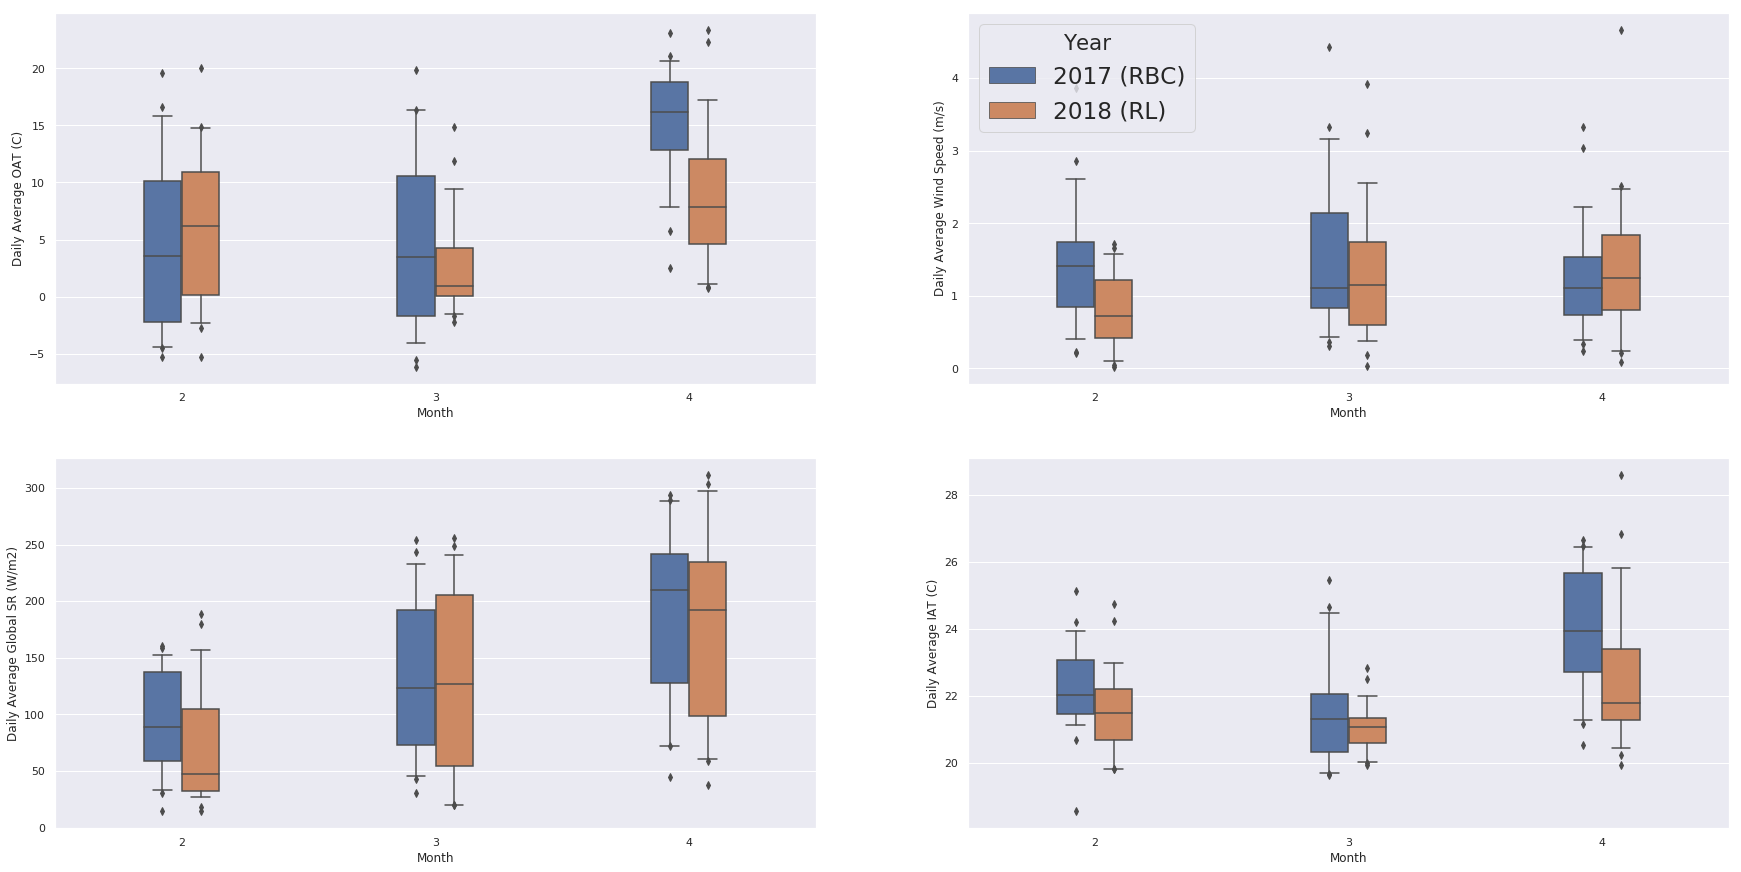

In [34]:
plt.figure(figsize=(30,15))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax3 = plt.subplot2grid((2, 2), (0, 1))
ax4 = plt.subplot2grid((2, 2), (1, 1))
#ax3.set_ylim(0,500)
sns.set(font_scale=2.1)
sns.boxplot(x = 'Month', y = 'Daily Average OAT (C)', hue = 'Year', data = cmbd_oat_daily_all_df
            , palette = 'deep', width = 0.3, whis = [5, 95], ax=ax1)
sns.boxplot(x = 'Month', y = 'Daily Average Global SR (W/m2)', hue = 'Year', data = cmbd_solarGlob_daily_all_df
            , palette = 'deep', width = 0.3, whis = [5, 95], ax=ax2)
sns.boxplot(x = 'Month', y = 'Daily Average Wind Speed (m/s)', hue = 'Year', data = cmbd_ws_daily_all_df
            , palette = 'deep', width = 0.3, whis = [5, 95], ax=ax3)
sns.boxplot(x = 'Month', y = 'Daily Average IAT (C)', hue = 'Year', data = cmbd_iat_daily_all_df
            , palette = 'deep', width = 0.3, whis = [5, 95], ax=ax4)


ax1.legend_.remove()
ax2.legend_.remove()
ax4.legend_.remove()

In [35]:
# Use GP to predict
rl_all_daily_all_df = pd.concat([cmbd_oat_daily_all_df['Daily Average OAT (C)'], cmbd_solarGlob_daily_all_df['Daily Average Global SR (W/m2)'], 
                                 cmbd_iat_daily_all_df['Daily Average IAT (C)'], cmbd_energy_daily_all_df], axis=1)
rl_all_daily_all_df = rl_all_daily_all_df.loc[(rl_all_daily_all_df['Year'] == '2018 (RL)') &
                                             (rl_all_daily_all_df["Daily Total Heating Energy (kWh)"] > 40)]
rl_gp_x = rl_all_daily_all_df[['Daily Average OAT (C)','Daily Average Global SR (W/m2)','Daily Average IAT (C)']].as_matrix()
rl_gp_y = rl_all_daily_all_df[['Daily Total Heating Energy (kWh)']].as_matrix()
# Normalize x y
rl_gp_x_stdized = std_scaler_x.transform(rl_gp_x)
rl_gp_y_stdized = std_scaler_y.transform(rl_gp_y)

/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/zhiangz/Documents/HVAC-RL-Control/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [277]:
arr

NameError: name 'arr' is not defined

[736754. 736785.]


([<matplotlib.axis.XTick at 0x7ff11d4418d0>,
 <a list of 4 Text xticklabel objects>)

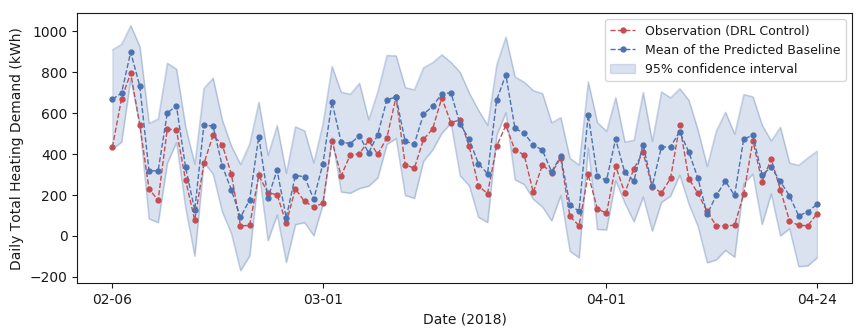

In [36]:
import datetime
import matplotlib.dates as mdates
mpl.rcParams.update(mpl.rcParamsDefault)
# Use GP to predict
rl_gp_y_pred, rl_gp_y_pred_std = rg.predict(rl_gp_x_stdized, return_std=True)
rl_gp_y_pred = np.ravel(rl_gp_y_pred)
rl_gp_y_pred_org = std_scaler_y.inverse_transform(rl_gp_y_pred) 
rl_gp_y_pred_org_std = std_scaler_y.inverse_transform(rl_gp_y_pred_std) - std_scaler_y.mean_
ob_at_gp_std = np.divide(np.ravel(rl_gp_y) - rl_gp_y_pred_org, rl_gp_y_pred_org_std)

basetime = datetime.datetime.strptime('2018-02-06', '%Y-%m-%d').date()
x_plot = np.array([basetime + datetime.timedelta(days=i) for i in range(78)])
yearsFmt = mdates.DateFormatter('%m-%d')
months = mdates.MonthLocator()  # every month

fig = plt.figure(figsize=(10, 3.5))
plt.plot(x_plot, rl_gp_y, '.r', linestyle = '--', markersize = 7,
        label = 'Observation (DRL Control)', linewidth = 1)
plt.plot(x_plot, rl_gp_y_pred_org, '.b', linestyle = '--', markersize = 7, label = 'Mean of the Predicted Baseline',
        linewidth = 1)
std_scl = 1.96
plt.plot(x_plot, rl_gp_y_pred_org - std_scl * rl_gp_y_pred_org_std, '-b', alpha=0.2, linewidth = 1)
plt.plot(x_plot, rl_gp_y_pred_org + std_scl * rl_gp_y_pred_org_std, '-b', alpha=0.2, linewidth = 1)
plt.fill_between(x_plot, rl_gp_y_pred_org - std_scl * rl_gp_y_pred_org_std, 
                 rl_gp_y_pred_org + std_scl * rl_gp_y_pred_org_std, color='b', alpha=0.2, 
                 label = '95% confidence interval')
plt.xlabel('Date (2018)', fontsize = 10)
plt.ylabel('Daily Total Heating Demand (kWh)', fontsize = 10)
plt.tick_params(labelsize = 10)
plt.legend(fontsize = 9, loc="best")
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_major_locator(months)
print (plt.xticks()[0])
plt.xticks(np.append(plt.xticks()[0], [x_plot[0].toordinal(), x_plot[-1].toordinal()]))

In [37]:
rl_gp_y_pred_org.sum()

31327.7848227501

In [38]:
# Use GP to sample
sample_num = 5000
rl_gp_y_sampled = rg.sample_y(rl_gp_x_stdized, n_samples = sample_num);
rl_gp_y_sampled = std_scaler_y.inverse_transform(rl_gp_y_sampled)
rl_gp_y_sampled = rl_gp_y_sampled.squeeze().T
rl_gp_y_sampled = rl_gp_y_sampled.clip(0)

for row_i in range(rl_gp_y_sampled.shape[0]):
    rl_all_daily_all_df['y_sampled_%s'%(row_i)] = pd.Series(rl_gp_y_sampled[row_i, :], index=rl_all_daily_all_df.index)


In [41]:
rl_gp_y_sampled

array([[ 670.97744533,  568.6425361 ,  851.90519673, ...,   63.27892873,
         106.2439974 ,  215.967019  ],
       [ 773.18523748,  732.10254063,  842.57302211, ...,  174.6399934 ,
          22.59728245,  162.62079132],
       [ 561.72545204,  782.86227849,  864.60923782, ...,   67.48229373,
         163.92369369,  401.62937073],
       ...,
       [ 860.71933621,  692.76292005,  900.73485554, ...,  170.58121724,
         118.5733697 ,  125.55919752],
       [ 715.67752895,  820.44251676, 1035.89561337, ...,   55.47934057,
         154.95648807,  335.08951745],
       [ 698.85030597,  783.28105257,  859.33342681, ...,   48.26506745,
         292.77307872,   34.22078445]])

[736754. 736785.]


([<matplotlib.axis.XTick at 0x7ff105932d68>,
 <a list of 4 Text xticklabel objects>)

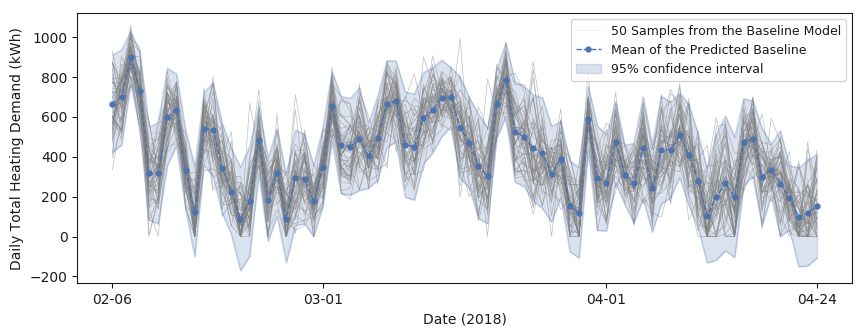

In [51]:
# Plot 5000 samples
mpl.rcParams.update(mpl.rcParamsDefault)
# Use GP to predict
rl_gp_y_pred, rl_gp_y_pred_std = rg.predict(rl_gp_x_stdized, return_std=True)
rl_gp_y_pred = np.ravel(rl_gp_y_pred)
rl_gp_y_pred_org = std_scaler_y.inverse_transform(rl_gp_y_pred) 
rl_gp_y_pred_org_std = std_scaler_y.inverse_transform(rl_gp_y_pred_std) - std_scaler_y.mean_
ob_at_gp_std = np.divide(np.ravel(rl_gp_y) - rl_gp_y_pred_org, rl_gp_y_pred_org_std)

basetime = datetime.datetime.strptime('2018-02-06', '%Y-%m-%d').date()
x_plot = np.array([basetime + datetime.timedelta(days=i) for i in range(78)])
yearsFmt = mdates.DateFormatter('%m-%d')
months = mdates.MonthLocator()  # every month

fig = plt.figure(figsize=(10, 3.5))
for rl_gp_y_sampled_i in rl_gp_y_sampled[0:50, :]:
    plt.plot(x_plot, rl_gp_y_sampled_i, color = 'grey', alpha=0.5, linewidth = 0.5)
plt.plot(x_plot, rl_gp_y_sampled[-1, :], color = 'grey', alpha=0.2, linewidth = 0.5, label = '50 Samples from the Baseline Model')
plt.plot(x_plot, rl_gp_y_pred_org, '.b', linestyle = '--', markersize = 7, label = 'Mean of the Predicted Baseline',
        linewidth = 1)
std_scl = 1.96
plt.plot(x_plot, rl_gp_y_pred_org - std_scl * rl_gp_y_pred_org_std, '-b', alpha=0.2, linewidth = 1)
plt.plot(x_plot, rl_gp_y_pred_org + std_scl * rl_gp_y_pred_org_std, '-b', alpha=0.2, linewidth = 1)
plt.fill_between(x_plot, rl_gp_y_pred_org - std_scl * rl_gp_y_pred_org_std, 
                 rl_gp_y_pred_org + std_scl * rl_gp_y_pred_org_std, color='b', alpha=0.2, 
                 label = '95% confidence interval')
plt.xlabel('Date (2018)', fontsize = 10)
plt.ylabel('Daily Total Heating Demand (kWh)', fontsize = 10)
plt.tick_params(labelsize = 10)
plt.legend(fontsize = 9, loc="best")
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_major_locator(months)
print (plt.xticks()[0])
plt.xticks(np.append(plt.xticks()[0], [x_plot[0].toordinal(), x_plot[-1].toordinal()]))

In [282]:
# Analyze monthly energy distribution

rl_monthly_sampled_y = rl_all_daily_all_df.groupby('Month').mean()
rl_monthly_sampled_y_dp = rl_monthly_sampled_y.drop(['Weekday', 'Daily Average OAT (C)', 'Daily Average IAT (C)',
                                                  'Daily Average Global SR (W/m2)',
                                                 'Daily Total Heating Energy (kWh)'], axis = 1)
rl_monthly_sampled_y_mat = rl_monthly_sampled_y_dp.as_matrix()

/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


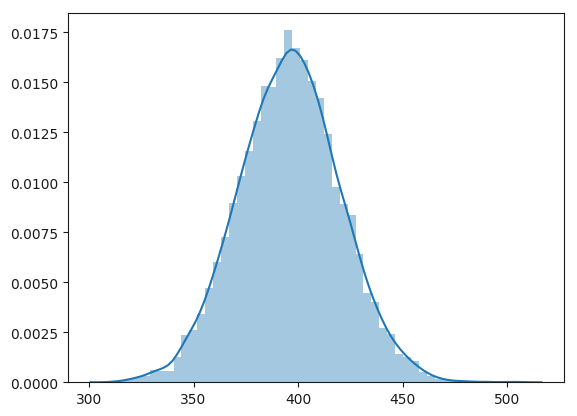

In [283]:
sns.distplot(rl_monthly_sampled_y_mat[0, :])

In [284]:
import math
rl_hist_bin = 1000
rl_pred_feb_hist_rge = [int(math.floor((rl_monthly_sampled_y_mat[0, :].min())/ 10.0)) * 10 ,
                        int(math.ceil((rl_monthly_sampled_y_mat[0, :].max())/ 10.0)) * 10]
rl_pred_feb_hist, rl_pred_feb_bin_edges = np.histogram(rl_monthly_sampled_y_mat[0, :], bins=rl_hist_bin, 
                                                       range = rl_pred_feb_hist_rge)
rl_hist_bin_itv = (rl_pred_feb_hist_rge[1] - rl_pred_feb_hist_rge[0])/rl_hist_bin
rl_pred_feb_hist_x = np.arange(rl_pred_feb_hist_rge[0], rl_pred_feb_hist_rge[1], rl_hist_bin_itv)

rl_pred_feb_cumsum = 100 * np.cumsum(rl_pred_feb_hist/sample_num)

mpl.rcParams.update(mpl.rcParamsDefault)


rl_pred_feb_5pct_y_idx = np.where(rl_pred_feb_cumsum < 5)[-1][-1]
rl_pred_feb_5pct_y = rl_pred_feb_cumsum[rl_pred_feb_5pct_y_idx]
rl_pred_feb_5pct_x = rl_pred_feb_hist_x[rl_pred_feb_5pct_y_idx]
rl_pred_feb_10pct_y_idx = np.where(rl_pred_feb_cumsum < 10)[-1][-1]
rl_pred_feb_10pct_y = rl_pred_feb_cumsum[rl_pred_feb_10pct_y_idx]
rl_pred_feb_10pct_x = rl_pred_feb_hist_x[rl_pred_feb_10pct_y_idx]


In [285]:
rl_hist_bin = 1000
rl_pred_mar_hist_rge = [int(math.floor((rl_monthly_sampled_y_mat[1, :].min())/ 10.0)) * 10 ,
                        int(math.ceil((rl_monthly_sampled_y_mat[1, :].max())/ 10.0)) * 10]
rl_pred_mar_hist, rl_pred_mar_bin_edges = np.histogram(rl_monthly_sampled_y_mat[1, :], bins=rl_hist_bin, 
                                                       range = rl_pred_mar_hist_rge)
rl_hist_bin_itv = (rl_pred_mar_hist_rge[1] - rl_pred_mar_hist_rge[0])/rl_hist_bin
rl_pred_mar_hist_x = np.arange(rl_pred_mar_hist_rge[0], rl_pred_mar_hist_rge[1], rl_hist_bin_itv)

rl_pred_mar_cumsum = 100 * np.cumsum(rl_pred_mar_hist/sample_num)

rl_pred_mar_5pct_y_idx = np.where(rl_pred_mar_cumsum < 5)[-1][-1]
rl_pred_mar_5pct_y = rl_pred_mar_cumsum[rl_pred_mar_5pct_y_idx]
rl_pred_mar_5pct_x = rl_pred_mar_hist_x[rl_pred_mar_5pct_y_idx]
rl_pred_mar_10pct_y_idx = np.where(rl_pred_mar_cumsum < 10)[-1][-1]
rl_pred_mar_10pct_y = rl_pred_mar_cumsum[rl_pred_mar_10pct_y_idx]
rl_pred_mar_10pct_x = rl_pred_mar_hist_x[rl_pred_mar_10pct_y_idx]


In [286]:
rl_hist_bin = 1000
rl_pred_apr_hist_rge = [int(math.floor((rl_monthly_sampled_y_mat[2, :].min())/ 10.0)) * 10 ,
                        int(math.ceil((rl_monthly_sampled_y_mat[2, :].max())/ 10.0)) * 10]
rl_pred_apr_hist, rl_pred_apr_bin_edges = np.histogram(rl_monthly_sampled_y_mat[2, :], bins=rl_hist_bin, 
                                                       range = rl_pred_apr_hist_rge)
rl_hist_bin_itv = (rl_pred_apr_hist_rge[1] - rl_pred_apr_hist_rge[0])/rl_hist_bin
rl_pred_apr_hist_x = np.arange(rl_pred_apr_hist_rge[0], rl_pred_apr_hist_rge[1], rl_hist_bin_itv)

rl_pred_apr_cumsum = 100 * np.cumsum(rl_pred_apr_hist/sample_num)

rl_pred_apr_0pct_y_idx = np.where(rl_pred_apr_cumsum <= 0)[-1][-1]
rl_pred_apr_0pct_y = rl_pred_apr_cumsum[rl_pred_apr_0pct_y_idx]
rl_pred_apr_0pct_x = rl_pred_apr_hist_x[rl_pred_apr_0pct_y_idx]
rl_pred_apr_5pct_y_idx = np.where(rl_pred_apr_cumsum < 5)[-1][-1]
rl_pred_apr_5pct_y = rl_pred_apr_cumsum[rl_pred_apr_5pct_y_idx]
rl_pred_apr_5pct_x = rl_pred_apr_hist_x[rl_pred_apr_5pct_y_idx]
rl_pred_apr_10pct_y_idx = np.where(rl_pred_apr_cumsum < 10)[-1][-1]
rl_pred_apr_10pct_y = rl_pred_apr_cumsum[rl_pred_apr_10pct_y_idx]
rl_pred_apr_10pct_x = rl_pred_apr_hist_x[rl_pred_apr_10pct_y_idx]


In [287]:
rl_pred_apr_0pct_x

206.93000000000026

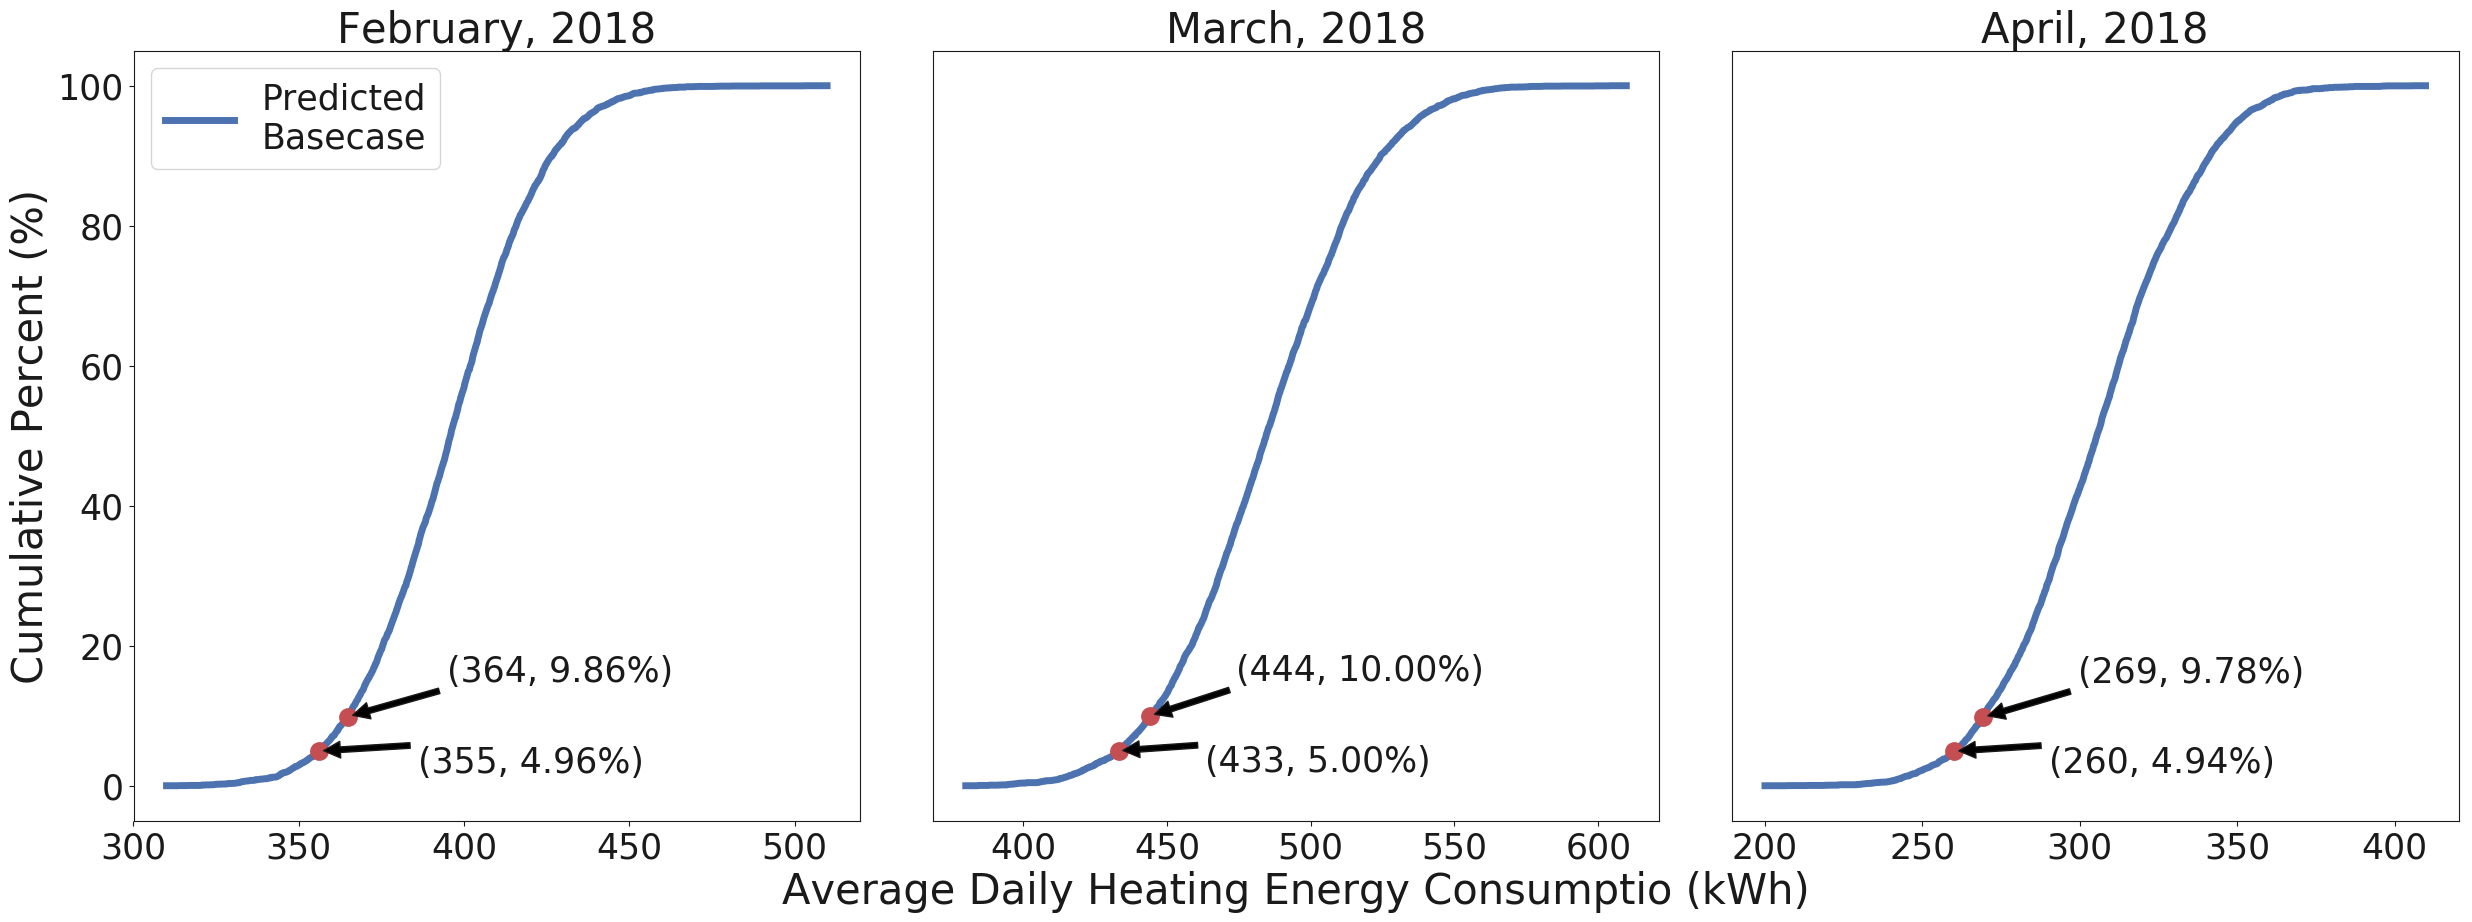

In [288]:
fig = plt.figure(figsize=(30, 10))
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1), sharey=ax1)
ax3 = plt.subplot2grid((1, 3), (0, 2), sharey=ax1)

ax1.plot(rl_pred_feb_hist_x, rl_pred_feb_cumsum, 'b', linewidth=5.0, label = 'Predicted\nBasecase')
ax1.plot(rl_pred_feb_5pct_x, rl_pred_feb_5pct_y, '.r', markersize=25.0)
ax1.annotate('(%d, %.2f%%)'%(rl_pred_feb_5pct_x, rl_pred_feb_5pct_y), 
             xy=(rl_pred_feb_5pct_x, rl_pred_feb_5pct_y), xytext=(rl_pred_feb_5pct_x + 30, rl_pred_feb_5pct_y - 3),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 25
            )
ax1.plot(rl_pred_feb_10pct_x, rl_pred_feb_10pct_y, '.r', markersize=25.0)
ax1.annotate('(%d, %.2f%%)'%(rl_pred_feb_10pct_x, rl_pred_feb_10pct_y), 
             xy=(rl_pred_feb_10pct_x, rl_pred_feb_10pct_y), xytext=(rl_pred_feb_10pct_x + 30, rl_pred_feb_10pct_y + 5),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 25
            )
ax1.tick_params(labelsize = 25)
ax1.set_ylabel('Cumulative Percent (%)', fontsize = 30)
#ax1.set_xlim(300,520)
ax1.set_title('February, 2018', fontsize = 30)
ax1.legend(fontsize = 25, loc="upper left")


ax2.plot(rl_pred_mar_hist_x, rl_pred_mar_cumsum, 'b', linewidth=5.0)
ax2.plot(rl_pred_mar_5pct_x, rl_pred_mar_5pct_y, '.r', markersize=25.0)
ax2.annotate('(%d, %.2f%%)'%(rl_pred_mar_5pct_x, rl_pred_mar_5pct_y), 
             xy=(rl_pred_mar_5pct_x, rl_pred_mar_5pct_y), xytext=(rl_pred_mar_5pct_x + 30, rl_pred_mar_5pct_y - 3),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 25
            )
ax2.plot(rl_pred_mar_10pct_x, rl_pred_mar_10pct_y, '.r', markersize=25.0)
ax2.annotate('(%d, %.2f%%)'%(rl_pred_mar_10pct_x, rl_pred_mar_10pct_y), 
             xy=(rl_pred_mar_10pct_x, rl_pred_mar_10pct_y), xytext=(rl_pred_mar_10pct_x + 30, rl_pred_mar_10pct_y + 5),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 25
            )
ax2.tick_params(labelsize = 25)
ax2.set_xlabel('Average Daily Heating Energy Consumptio (kWh)', fontsize = 30)
ax2.set_title('March, 2018', fontsize = 30)

ax3.plot(rl_pred_apr_hist_x, rl_pred_apr_cumsum, 'b', linewidth=5.0)
ax3.plot(rl_pred_apr_5pct_x, rl_pred_apr_5pct_y, '.r', markersize=25.0)
ax3.annotate('(%d, %.2f%%)'%(rl_pred_apr_5pct_x, rl_pred_apr_5pct_y), 
             xy=(rl_pred_apr_5pct_x, rl_pred_apr_5pct_y), xytext=(rl_pred_apr_5pct_x + 30, rl_pred_apr_5pct_y - 3),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 25
            )
ax3.plot(rl_pred_apr_10pct_x, rl_pred_apr_10pct_y, '.r', markersize=25.0)
ax3.annotate('(%d, %.2f%%)'%(rl_pred_apr_10pct_x, rl_pred_apr_10pct_y), 
             xy=(rl_pred_apr_10pct_x, rl_pred_apr_10pct_y), xytext=(rl_pred_apr_10pct_x + 30, rl_pred_apr_10pct_y + 5),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 25
            )
ax3.tick_params(labelsize = 25)
ax3.set_title('April, 2018', fontsize = 30)

ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
fig.subplots_adjust(wspace=0.1)

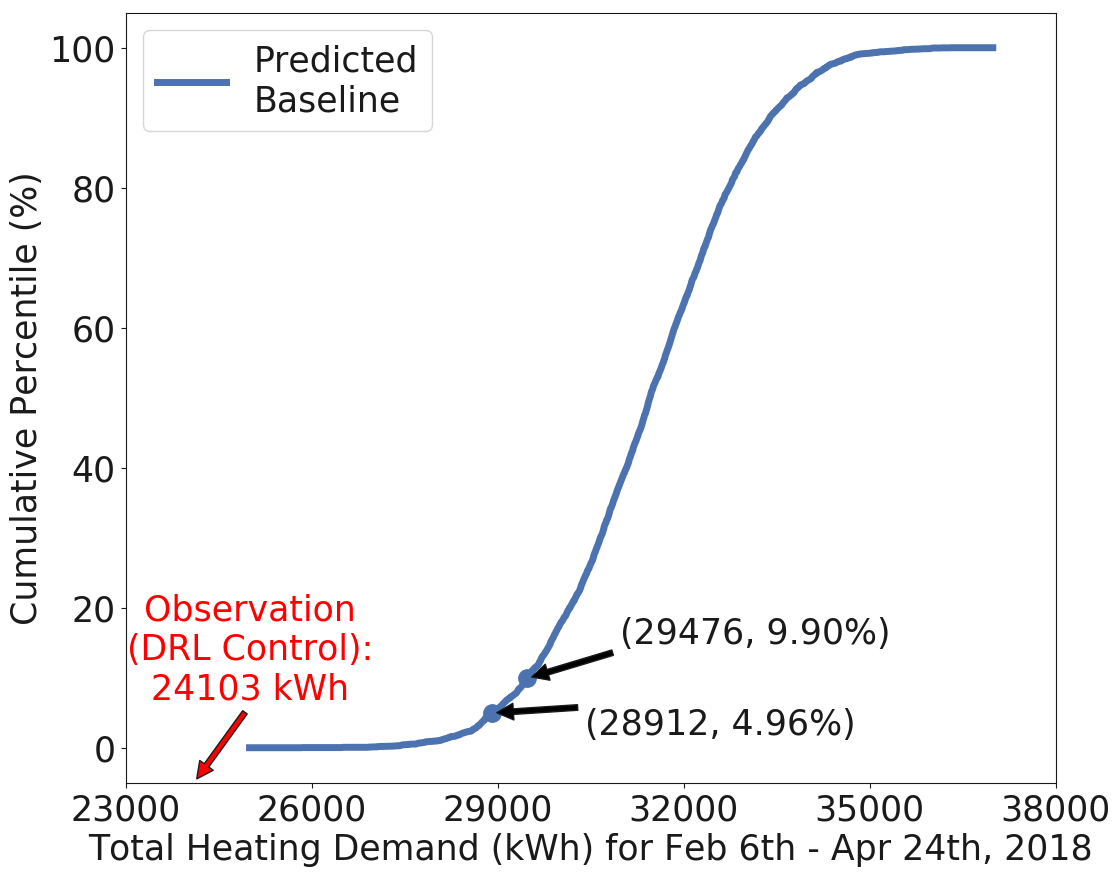

In [289]:
# Plot total heating demand for the period
rl_gp_y_sampled_sum = rl_gp_y_sampled.sum(axis=1)
rl_hist_bin = 1000
rl_pred_all_hist_rge = [int(math.floor((rl_gp_y_sampled_sum.min())/ 1000.0)) * 1000 ,
                        int(math.ceil((rl_gp_y_sampled_sum.max())/ 1000.0)) * 1000]
rl_pred_all_hist, rl_pred_all_bin_edges = np.histogram(rl_gp_y_sampled_sum, bins=rl_hist_bin, 
                                                       range = rl_pred_all_hist_rge)
rl_hist_bin_itv = (rl_pred_all_hist_rge[1] - rl_pred_all_hist_rge[0])/rl_hist_bin
rl_pred_all_hist_x = np.arange(rl_pred_all_hist_rge[0], rl_pred_all_hist_rge[1], rl_hist_bin_itv)

rl_pred_all_cumsum = 100 * np.cumsum(rl_pred_all_hist/sample_num)

rl_pred_all_0pct_y_idx = np.where(rl_pred_all_cumsum < 0.1)[-1][-1]
rl_pred_all_0pct_y = rl_pred_all_cumsum[rl_pred_all_0pct_y_idx]
rl_pred_all_0pct_x = rl_pred_all_hist_x[rl_pred_all_0pct_y_idx]
rl_pred_all_5pct_y_idx = np.where(rl_pred_all_cumsum < 5)[-1][-1]
rl_pred_all_5pct_y = rl_pred_all_cumsum[rl_pred_all_5pct_y_idx]
rl_pred_all_5pct_x = rl_pred_all_hist_x[rl_pred_all_5pct_y_idx]
rl_pred_all_10pct_y_idx = np.where(rl_pred_all_cumsum < 10)[-1][-1]
rl_pred_all_10pct_y = rl_pred_all_cumsum[rl_pred_all_10pct_y_idx]
rl_pred_all_10pct_x = rl_pred_all_hist_x[rl_pred_all_10pct_y_idx]
rl_pred_all_50pct_y_idx = np.where(rl_pred_all_cumsum < 50)[-1][-1]
rl_pred_all_50pct_y = rl_pred_all_cumsum[rl_pred_all_50pct_y_idx]
rl_pred_all_50pct_x = rl_pred_all_hist_x[rl_pred_all_50pct_y_idx]

fig = plt.figure(figsize=(12, 10))
plt.plot(rl_pred_all_hist_x, rl_pred_all_cumsum, 'b', linewidth=5.0, label = 'Predicted\nBaseline')
plt.plot(rl_pred_all_5pct_x, rl_pred_all_5pct_y, '.b', markersize=25.0)
plt.annotate('(%d, %.2f%%)'%(rl_pred_all_5pct_x, rl_pred_all_5pct_y), 
             xy=(rl_pred_all_5pct_x, rl_pred_all_5pct_y), xytext=(rl_pred_all_5pct_x + 1500, rl_pred_all_5pct_y - 3),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 25
            )
plt.plot(rl_pred_all_10pct_x, rl_pred_all_10pct_y, '.b', markersize=25.0)
plt.annotate('(%d, %.2f%%)'%(rl_pred_all_10pct_x, rl_pred_all_10pct_y), 
             xy=(rl_pred_all_10pct_x, rl_pred_all_10pct_y), xytext=(rl_pred_all_10pct_x + 1500, 
                                                                    rl_pred_all_10pct_y + 5),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 25
            )
plt.annotate('Observation\n (DRL Control): \n%d kWh'%(rl_gp_y.sum()), 
             xy=(rl_gp_y.sum(), -5), xytext=(rl_gp_y.sum() + 900, 6),
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center',
            verticalalignment='bottom', fontsize = 25, color = 'red'
            )
plt.tick_params(labelsize = 25)
plt.ylabel('Cumulative Percentile (%)', fontsize = 25)
plt.xlabel('Total Heating Demand (kWh) for Feb 6th - Apr 24th, 2018', fontsize = 25)
plt.xlim(23000,38000)
plt.xticks(np.arange(23000, 38000 + 1, 3000))
plt.legend(fontsize = 25, loc="upper left")

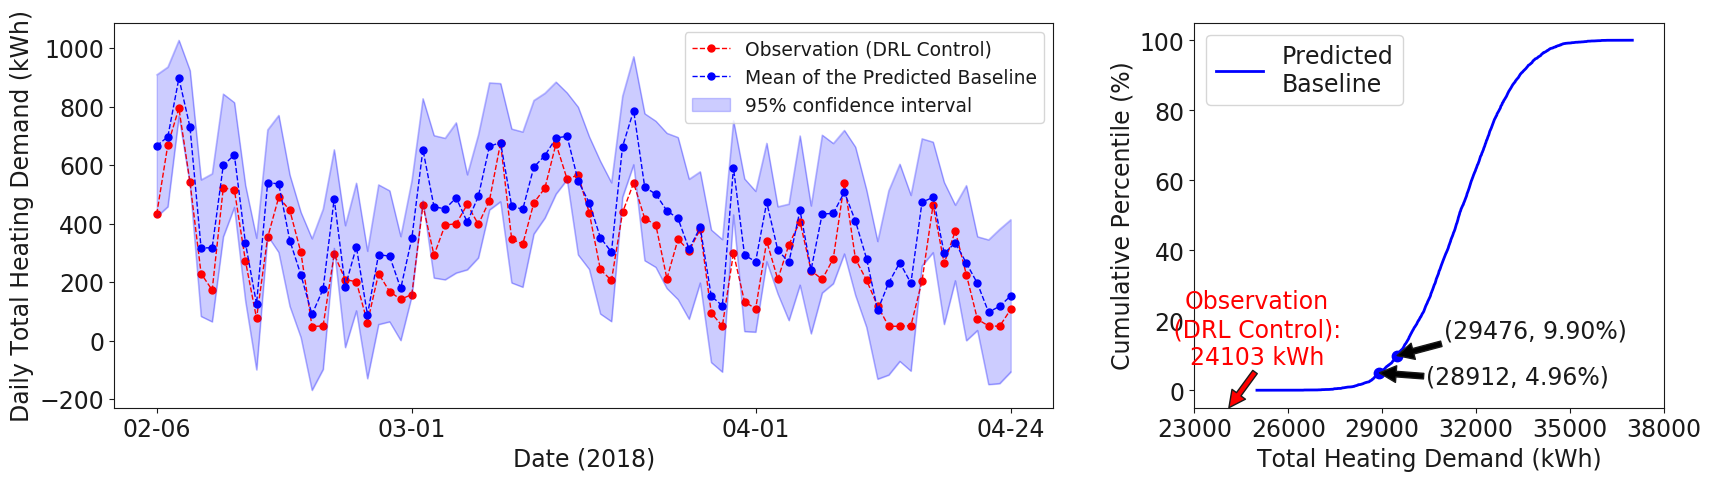

In [368]:
f, (a0, a1) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[2, 1]}, figsize=(20, 5))
# Plot 1
basetime = datetime.datetime.strptime('2018-02-06', '%Y-%m-%d').date()
x_plot = np.array([basetime + datetime.timedelta(days=i) for i in range(78)])
yearsFmt = mdates.DateFormatter('%m-%d')
months = mdates.MonthLocator()  # every month

localMarkerSize = 10
localFontSize = 17

a0.plot(x_plot, rl_gp_y, 'red', marker = '.', linestyle = '--', markersize = localMarkerSize,
        label = 'Observation (DRL Control)', linewidth = 1)
a0.plot(x_plot, rl_gp_y_pred_org, 'blue', marker = '.', linestyle = '--', markersize = localMarkerSize, label = 'Mean of the Predicted Baseline',
        linewidth = 1)
std_scl = 1.96
a0.plot(x_plot, rl_gp_y_pred_org - std_scl * rl_gp_y_pred_org_std, 'blue', alpha=0.2, linewidth = 1)
a0.plot(x_plot, rl_gp_y_pred_org + std_scl * rl_gp_y_pred_org_std, 'blue', alpha=0.2, linewidth = 1)
a0.fill_between(x_plot, rl_gp_y_pred_org - std_scl * rl_gp_y_pred_org_std, 
                 rl_gp_y_pred_org + std_scl * rl_gp_y_pred_org_std, color='blue', alpha=0.2, 
                 label = '95% confidence interval')
a0.set_xlabel('Date (2018)', fontsize = localFontSize)
a0.set_ylabel('Daily Total Heating Demand (kWh)', fontsize = localFontSize)
a0.tick_params(labelsize = localFontSize)
a0.legend(fontsize = 13.5, loc="best")
a0.xaxis.set_major_formatter(yearsFmt)
a0.xaxis.set_major_locator(months)
a0.set_xticks(np.append(a0.get_xticks(), [x_plot[0].toordinal(), x_plot[-1].toordinal()]))

#plot 2
plot2fontsize = 17
plot2markersize = 15
a1.plot(rl_pred_all_hist_x, rl_pred_all_cumsum, 'blue', linewidth=2, label = 'Predicted\nBaseline')
a1.plot(rl_pred_all_5pct_x, rl_pred_all_5pct_y, 'blue', marker = '.', markersize=plot2markersize)
a1.annotate('(%d, %.2f%%)'%(rl_pred_all_5pct_x, rl_pred_all_5pct_y), 
             xy=(rl_pred_all_5pct_x, rl_pred_all_5pct_y), xytext=(rl_pred_all_5pct_x + 1500, rl_pred_all_5pct_y - 3),
            arrowprops=dict(facecolor='black', shrink=0.0000005), fontsize = plot2fontsize
            )
a1.plot(rl_pred_all_10pct_x, rl_pred_all_10pct_y, 'blue', marker = '.', markersize=plot2markersize)
a1.annotate('(%d, %.2f%%)'%(rl_pred_all_10pct_x, rl_pred_all_10pct_y), 
             xy=(rl_pred_all_10pct_x, rl_pred_all_10pct_y), xytext=(rl_pred_all_10pct_x + 1500, 
                                                                    rl_pred_all_10pct_y + 5),
            arrowprops=dict(facecolor='black', shrink=0.00005), fontsize = plot2fontsize
            )
a1.annotate('Observation\n (DRL Control): \n%d kWh'%(rl_gp_y.sum()), 
             xy=(rl_gp_y.sum(), -5), xytext=(rl_gp_y.sum() + 900, 6),
            arrowprops=dict(facecolor='red', shrink=0.00005),
            horizontalalignment='center',
            verticalalignment='bottom', fontsize = plot2fontsize, color = 'red'
            )
a1.tick_params(labelsize = plot2fontsize)
a1.set_ylabel('Cumulative Percentile (%)', fontsize = plot2fontsize)
a1.set_xlabel('Total Heating Demand (kWh)', fontsize = plot2fontsize)
a1.set_xlim(23000,38000)
a1.set_xticks(np.arange(23000, 38000 + 1, 3000))
a1.legend(fontsize = plot2fontsize, loc="upper left")

In [414]:
# Statistics for how many days have lower energy
std_scl = 1.645
sum((rl_gp_y.flatten() - (rl_gp_y_pred_org - std_scl * rl_gp_y_pred_org_std))<0)/78

0.16666666666666666

In [415]:
(sum(rl_gp_y.flatten()) - sum(rl_gp_y_pred_org))/sum(rl_gp_y_pred_org)

-0.23060575961456772

In [371]:
rl_gp_y.flatten()
print (rl_gp_y)

[[432.44544436]
 [668.78664564]
 [793.98618449]
 [540.33935605]
 [228.85939944]
 [172.49242409]
 [521.37167193]
 [515.5080714 ]
 [271.62052563]
 [ 75.99734501]
 [352.60536634]
 [489.82606514]
 [445.03110189]
 [301.02719809]
 [ 47.87056625]
 [ 49.92797124]
 [294.8455361 ]
 [208.57311296]
 [200.77035096]
 [ 61.24740114]
 [228.88038074]
 [167.22968176]
 [140.90358652]
 [157.32339343]
 [462.60567632]
 [291.78579301]
 [394.81164879]
 [399.15314908]
 [465.1317789 ]
 [397.11354063]
 [478.53867713]
 [675.82268612]
 [347.44531277]
 [329.10356128]
 [470.23939869]
 [521.17931912]
 [672.6682731 ]
 [551.88157715]
 [566.22131548]
 [436.52750777]
 [242.83482372]
 [205.49228022]
 [437.85506019]
 [538.54647596]
 [417.1294072 ]
 [395.5949342 ]
 [211.51221047]
 [346.15152072]
 [306.58586373]
 [379.91738609]
 [ 94.48764271]
 [ 49.17310182]
 [298.91488094]
 [132.75865242]
 [108.50327114]
 [339.35617647]
 [209.23202859]
 [327.736514  ]
 [406.27716662]
 [239.25176306]
 [208.96011486]
 [279.65910759]
 [539.89

In [372]:
rl_monthly_sampled_y

,Daily Average OAT (C),Daily Average Global SR (W/m2),Daily Average IAT (C),Daily Total Heating Energy (kWh),Weekday,y_sampled_0,y_sampled_1,y_sampled_2,y_sampled_3,y_sampled_4,...,y_sampled_4990,y_sampled_4991,y_sampled_4992,y_sampled_4993,y_sampled_4994,y_sampled_4995,y_sampled_4996,y_sampled_4997,y_sampled_4998,y_sampled_4999
Month,,,,,,,,,,,,,,,,,,,,,
2,6.120717,71.484256,21.585566,313.484582,2.869565,375.458370,412.650539,378.085281,383.795270,368.862717,...,390.268763,403.901931,390.897573,358.291736,451.063687,375.828608,441.973583,413.418675,427.593085,409.815797
3,2.596094,135.748414,21.047049,376.596995,3.096774,529.107430,483.081323,526.703678,467.734209,444.698190,...,456.020761,508.714293,469.343678,513.465444,485.535372,468.118860,496.291606,492.221793,510.153562,499.499593
4,8.491201,178.180199,22.393606,217.448541,2.875000,330.810363,300.332741,333.451875,231.892166,305.879589,...,308.937610,367.787653,319.068169,265.466595,295.043711,271.913291,314.943557,306.147989,336.308794,329.901817


In [373]:
# Statistics on base
base_oat_daily_feb = cmbd_oat_daily_all_df['Daily Average OAT (C)'][(cmbd_oat_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_oat_daily_all_df["Month"] == 2)]
base_oat_daily_mar = cmbd_oat_daily_all_df['Daily Average OAT (C)'][(cmbd_oat_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_oat_daily_all_df["Month"] == 3)]
base_oat_daily_apr = cmbd_oat_daily_all_df['Daily Average OAT (C)'][(cmbd_oat_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_oat_daily_all_df["Month"] == 4)]
base_oat_daily_feb_mean = np.mean(base_oat_daily_feb)
base_oat_daily_mar_mean = np.mean(base_oat_daily_mar)
base_oat_daily_apr_mean = np.mean(base_oat_daily_apr)
base_oat_daily_feb_std = np.std(base_oat_daily_feb)
base_oat_daily_mar_std = np.std(base_oat_daily_mar)
base_oat_daily_apr_std = np.std(base_oat_daily_apr)

base_sr_daily_feb = cmbd_solarGlob_daily_all_df['Daily Average Global SR (W/m2)'][(cmbd_solarGlob_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_solarGlob_daily_all_df["Month"] == 2)]
base_sr_daily_mar = cmbd_solarGlob_daily_all_df['Daily Average Global SR (W/m2)'][(cmbd_solarGlob_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_solarGlob_daily_all_df["Month"] == 3)]
base_sr_daily_apr = cmbd_solarGlob_daily_all_df['Daily Average Global SR (W/m2)'][(cmbd_solarGlob_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_solarGlob_daily_all_df["Month"] == 4)]
base_sr_daily_feb_mean = np.mean(base_sr_daily_feb)
base_sr_daily_mar_mean = np.mean(base_sr_daily_mar)
base_sr_daily_apr_mean = np.mean(base_sr_daily_apr)
base_sr_daily_feb_std = np.std(base_sr_daily_feb)
base_sr_daily_mar_std = np.std(base_sr_daily_mar)
base_sr_daily_apr_std = np.std(base_sr_daily_apr)

base_ht_daily_feb = cmbd_energy_daily_all_df['Daily Total Heating Energy (kWh)'][(cmbd_energy_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_energy_daily_all_df["Month"] == 2)]
base_ht_daily_mar = cmbd_energy_daily_all_df['Daily Total Heating Energy (kWh)'][(cmbd_energy_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_energy_daily_all_df["Month"] == 3)]
base_ht_daily_apr = cmbd_energy_daily_all_df['Daily Total Heating Energy (kWh)'][(cmbd_energy_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_energy_daily_all_df["Month"] == 4)]
base_ht_daily_feb_mean = np.mean(base_ht_daily_feb)
base_ht_daily_mar_mean = np.mean(base_ht_daily_mar)
base_ht_daily_apr_mean = np.mean(base_ht_daily_apr)
base_ht_daily_feb_std = np.std(base_ht_daily_feb)
base_ht_daily_mar_std = np.std(base_ht_daily_mar)
base_ht_daily_apr_std = np.std(base_ht_daily_apr)


In [374]:
# Statistics
cmbd_oat_sts = cmbd_oat_daily_all_df.groupby(
    [cmbd_oat_daily_all_df.Year, cmbd_oat_daily_all_df.Month]).agg(['mean', 'std'])

In [375]:
cmbd_oat_sts

Daily Average OAT (C)             Weekday          
                                  mean       std      mean       std
Year       Month                                                    
2017 (RBC) 2                  4.642089  7.213182  3.000000  2.036700
           3                  4.874955  7.432666  3.000000  1.949359
           4                 15.295632  4.827555  3.166667  2.069205
2018 (RL)  2                  6.120717  6.534678  2.869565  2.006905
           3                  2.596094  4.000914  3.096774  1.972390
           4                  8.940117  6.156556  3.000000  2.117253

In [376]:
# Plot oat base cmp


In [377]:
rl_oat_daily_all['temp'].as_matrix()

/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([-2.75477958, -2.29541752, -5.25706601, -1.08516084,  4.75026856,
        6.22351556, -0.15678205,  0.35614632,  8.16599281, 14.76920087,
        5.73210736, -0.18830074,  2.63444213,  9.90164298, 20.03235998,
       14.84653275,  5.00639662, 11.87727058, 10.15388702, 12.08756523,
        7.2471258 ,  7.09423877, 11.63530293,  9.42122978,  1.72084028,
        0.68215738,  0.91649655,  0.56411101,  3.88801942,  2.28161332,
       -1.52401205, -1.71554131, -0.15254541,  0.69285788,  0.90810666,
       -0.8514945 , -2.19820344,  1.7166539 , -0.629604  , -0.3057004 ,
        4.26390265,  6.71073687,  2.03123383, -0.53032535,  0.29426786,
        0.79199523,  1.65506491,  0.96654474,  5.22209046,  6.01496961,
       11.90378131, 14.87781978,  4.33616888,  6.52569288,  7.08075447,
        3.1370854 ,  8.84497616,  6.25423202,  2.46113507,  7.71175686,
        0.77096076,  1.58178623,  0.87083664,  3.17211494,  7.9774094 ,
       17.2451739 , 23.37503626, 22.31951589, 16.41817069,  5.35

In [378]:
base_energy_monthly_daily_mean

,energy
time_utc,
2017-02-28 00:00:00-05:00,436.757879
2017-03-31 00:00:00-04:00,354.684667
2017-04-30 00:00:00-04:00,46.909187


In [379]:
rl_energy_monthly_daily_mean

,energy
time_utc,
2018-02-28 00:00:00-05:00,313.484582
2018-03-31 00:00:00-04:00,376.596995
2018-04-30 00:00:00-04:00,176.564437


In [380]:
base_oat_monthly_mean

,temp
time_utc,
2017-02-28 00:00:00-05:00,4.642089
2017-03-31 00:00:00-04:00,4.887039
2017-04-30 00:00:00-04:00,15.295632


In [381]:
rl_oat_monthly_mean

,energy
time_utc,
2018-02-28 00:00:00-05:00,6.122057
2018-03-31 00:00:00-04:00,2.598656
2018-04-30 00:00:00-04:00,8.940117


In [382]:
print (base_energy_monthly)
print (rl_energy_monthly)

NameError: name 'base_energy_monthly' is not defined

In [383]:
base_oat_daily_interval

NameError: name 'base_oat_daily_interval' is not defined

In [384]:
rl_energy_daily

NameError: name 'rl_energy_daily' is not defined

In [385]:
rl_oat_daily

NameError: name 'rl_oat_daily' is not defined

In [386]:
plt.plot(base_oat_daily.as_matrix(columns = ['c']), base_energy_daily.as_matrix(columns = ['kwh']), '.', color = 'gray', label='Before DRL')
plt.plot(base_oat_daily_17.as_matrix(columns = ['c']), base_energy_daily_17.as_matrix(columns = ['kwh']), '.', color = 'black')
plt.plot(rl_oat_daily.as_matrix(columns = ['c']), rl_energy_daily.as_matrix(columns = ['kwh']), '.', color = 'red', label='After DRL')
plt.plot(9.45, 162, '.', color = 'red')
plt.plot(1.78, 441, '.', color = 'red')
plt.plot(0.57, 414, '.', color = 'red')
plt.plot(2.27, 390, '.', color = 'red')
plt.plot(-1.42, 496, '.', color = 'red')
plt.plot(-1.71, 641, '.', color = 'red')
plt.xlabel('Daily Average Outdoor Air Temperature (C)', fontsize=10)
plt.ylabel('Daily Total Heating Energy (kWh)', fontsize=10)
plt.legend(loc='upper right')

NameError: name 'base_oat_daily' is not defined

In [387]:
plt.plot(base_oat_daily_interval.as_matrix(columns = ['c']), color = 'gray')
plt.plot(rl_oat_daily_all.as_matrix(columns = ['c']), color = 'blue')

NameError: name 'base_oat_daily_interval' is not defined

In [388]:
base_oat_month_mean = np.mean(base_oat_daily_interval.as_matrix(columns = ['c']))
rl_oat_month_mean = np.mean(rl_oat_daily_all.as_matrix(columns = ['c']))

NameError: name 'base_oat_daily_interval' is not defined

In [389]:
print (base_oat_month_mean, rl_oat_month_mean, (rl_oat_month_mean-base_oat_month_mean)/base_oat_month_mean)

NameError: name 'base_oat_month_mean' is not defined

In [390]:
rlOb_all = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/imp/results/drl_dep_ob_all.csv',
                         index_col = 0, header = 0)


In [391]:
rlOb_all

,OAT C,OAH %,WS M/S,WD,SOLDIF W/M2,SOLDIR W/M2,HWOEN C,PPD(PRCD) %,MULSSP C,IAT C,...,AMVRAW_7,AMVRAW_8,AMVRAW_9,AMVRAW_10,AMVRAW_11,AMVRAW_12,AMVRAW_13,AMVRAW_14,AMVRAW_15,AMVRAW_16
time,,,,,,,,,,,,,,,,,,,,,
2018-02-06 10:11:59.970145,-3.805556,83.900002,1.251712,237.00,82.536320,4.503680e+00,10,20.327121,60.0,19.395993,...,3,3,3,3,3,3,3,3,3,3
2018-02-06 10:27:04.114122,-3.655556,83.900002,0.491744,282.00,101.362559,7.377441e+00,10,18.369280,35.0,19.695994,...,3,3,3,3,3,3,3,3,3,3
2018-02-06 10:29:17.210937,-3.655556,83.900002,0.491744,282.00,100.896897,7.103103e+00,10,20.987920,60.0,19.727991,...,3,3,3,3,3,3,3,3,3,3
2018-02-06 10:29:48.961939,-3.655556,83.900002,0.491744,282.00,100.927887,7.072113e+00,10,25.779459,17.5,19.731988,...,3,3,3,3,3,0,3,3,3,3
2018-02-06 10:31:21.639807,-3.655556,83.900002,0.491744,282.00,103.510490,7.559510e+00,10,30.558644,60.0,19.739990,...,3,3,3,3,3,0,3,3,3,3
2018-02-06 10:46:24.851775,-3.655556,83.900002,0.491744,282.00,109.898039,7.991961e+00,10,29.159387,60.0,19.983991,...,3,3,3,3,3,0,3,3,3,3
2018-02-06 11:01:29.009029,-3.122223,82.099998,0.491744,275.00,95.352604,4.537396e+00,10,14.508855,60.0,20.259993,...,3,3,3,3,3,3,3,3,3,3
2018-02-06 11:16:33.277069,-3.122223,82.099998,0.491744,275.00,75.701011,2.038989e+00,10,12.383110,60.0,20.575994,...,3,3,3,3,3,3,3,3,3,3
2018-02-06 11:31:37.092525,-2.744445,82.400002,1.519936,303.00,112.937108,6.532892e+00,10,10.758910,17.5,20.815989,...,3,3,3,3,3,3,3,3,3,3


In [392]:
av_all_mat = rlOb_all.as_matrix()[:, 13:]

/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [393]:
iat_all_mat = rlOb_all['IAT C'].as_matrix()

/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


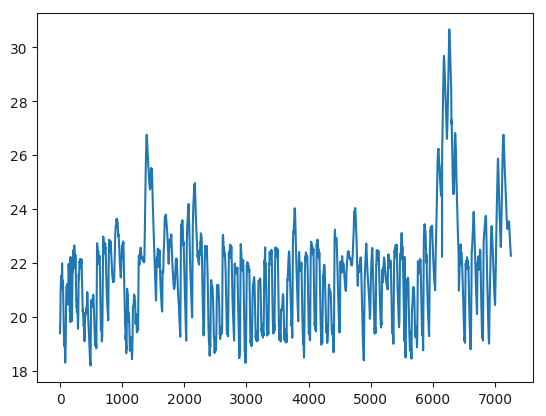

In [394]:
plt.plot(iat_all_mat)

In [395]:
av_all_mat[:, 0]

array([3., 3., 1., ..., 3., 3., 3.])

In [396]:
def getActionNum(av_array):
    vote_count = 0;
    vote_pre = av_array[0]
    for i in range(1, av_array.shape[0]):
        vote_this = av_array[i];
        if vote_this != 3:
            if vote_this != vote_pre:
                vote_count += 1;
        vote_pre = vote_this;
    return vote_count;
        
        
        

In [397]:
# Get vote count for all occupants
vote_count_all = []
for occp_i in range(av_all_mat.shape[1]):
    vote_count_all.append(getActionNum(av_all_mat[:, occp_i]))


In [398]:
vote_count_all

[36, 4, 2, 3, 3, 4, 0, 0, 12, 1, 2, 1, 7, 6, 3, 1, 0]

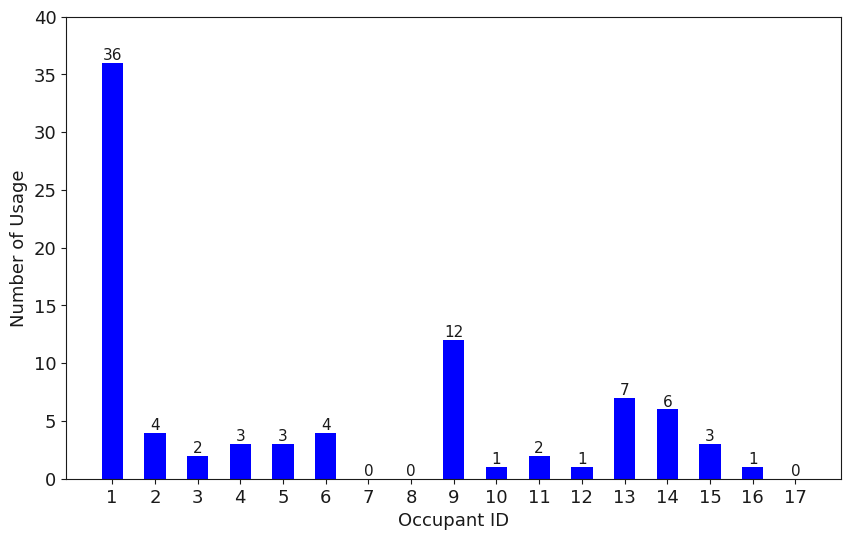

In [399]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % (height),
                ha='center', va='bottom', fontsize = 11)

plt.figure(figsize=(10, 6))
x = range(0, len(vote_count_all))
rect = plt.bar(x, vote_count_all, align='center', color = 'blue',width = 0.5, 
        label = 'Observation')
plt.xticks(x, range(1, len(vote_count_all) + 1), fontsize = 13)
plt.xlabel('Occupant ID', fontsize = 13)
plt.ylabel('Number of Usage', fontsize = 13)
plt.tick_params(labelsize = 13)
plt.ylim(0, 40)
#plt.plot(x_plot, y_pred_org, '.b', linestyle = '--', markersize = 7, label = 'Prediction', linewidth = 1)
#plt.plot(x_plot, y_pred_org - 1.9600 * y_pred_org_std, '-b', alpha=0.2, linewidth = 1)
#plt.plot(x_plot, y_pred_org + 1.9600 * y_pred_org_std, '-b', alpha=0.2, linewidth = 1)
#plt.fill_between(x_plot, y_pred_org - 1.9600 * y_pred_org_std, 
#                 y_pred_org + 1.9600 * y_pred_org_std, color='b', alpha=0.2, label = '95% confidence interval')
#plt.xlabel('Data Index', fontsize = 13)
#plt.ylabel('Daily Heating Energy Consumption (kWh)', fontsize = 13)
#plt.tick_params(labelsize = 13)
#plt.legend(fontsize = 10, loc="best")
#
autolabel(rect)

In [400]:
def getPrefNum(av_array):
    pref_count = [0 for i in range(7)]
    vote_pre = av_array[0]
    for i in range(1, av_array.shape[0]):
        vote_this = av_array[i];
        if vote_this != 3:
            if vote_this != vote_pre:
                pref_count[int(vote_this)] += 1;
        vote_pre = vote_this;
    return pref_count;

In [401]:
# Get preference count for all occupants
pref_count_all = []
for occp_i in range(av_all_mat.shape[1]):
    pref_count_all.append(getPrefNum(av_all_mat[:, occp_i]))

In [402]:
pref_count_all

[[18, 14, 3, 0, 1, 0, 0],
 [2, 2, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 2, 0],
 [2, 1, 0, 0, 0, 0, 0],
 [0, 1, 2, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 2, 10, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [4, 0, 2, 0, 0, 0, 1],
 [4, 1, 1, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

In [403]:
pref_count_all = np.array(pref_count_all)
pref_count_all  = np.delete(pref_count_all, 3, axis = 1) #Col: warmest, warmer (2), warmer(1), cooler (1), cooler (2), coldest

In [404]:
pref_count_all

array([[18, 14,  3,  1,  0,  0],
       [ 2,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 2,  1,  0,  0,  0,  0],
       [ 0,  1,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  2, 10,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0],
       [ 4,  0,  2,  0,  0,  1],
       [ 4,  1,  1,  0,  0,  0],
       [ 1,  1,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]])

17


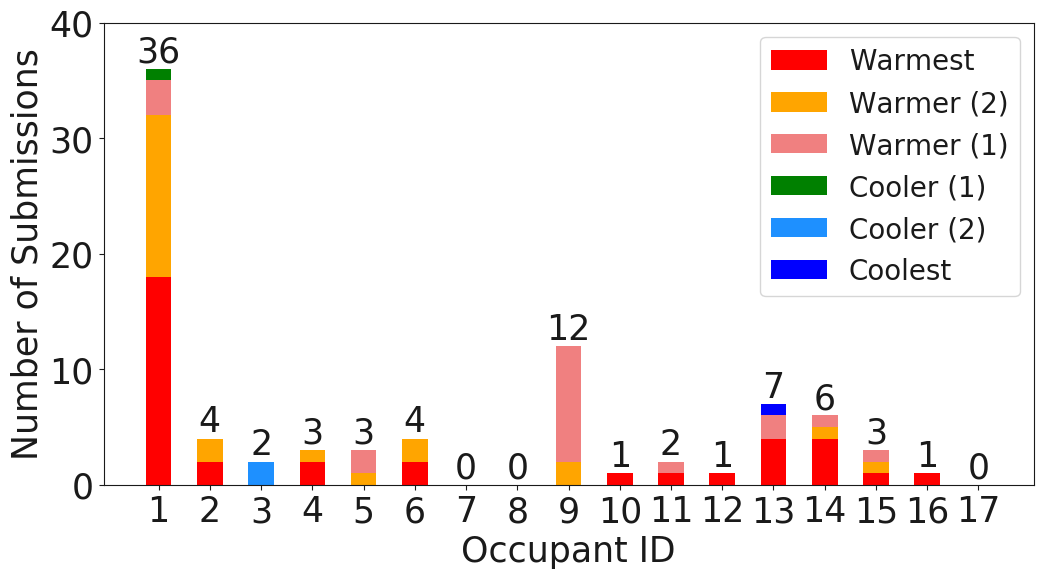

In [408]:
def autolabel(rects, values):
    """
    Attach a text label above each bar displaying its height
    """
    print (len(rects))
    i = 0
    for rect in rects:
        height = values[i]
        plt.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % (height),
                ha='center', va='bottom', fontsize = 25)
        i += 1;

plt.figure(figsize=(12, 6))
x = range(0, len(vote_count_all))
rect1 = plt.bar(x, pref_count_all.T[0, :], align='center', color = 'red',width = 0.5, 
        label = 'Warmest')
rect2 = plt.bar(x, pref_count_all.T[1, :], align='center', color = 'orange',width = 0.5, 
        label = 'Warmer (2)', bottom=pref_count_all.T[0, :])
rect3 = plt.bar(x, pref_count_all.T[2, :], align='center', color = 'lightcoral',width = 0.5, 
        label = 'Warmer (1)', bottom=pref_count_all.T[0, :] + pref_count_all.T[1, :])
rect4 = plt.bar(x, pref_count_all.T[3, :], align='center', color = 'green',width = 0.5, 
        label = 'Cooler (1)', 
                bottom=pref_count_all.T[0, :] + pref_count_all.T[1, :] + pref_count_all.T[2, :])
rect5 = plt.bar(x, pref_count_all.T[4, :], align='center', color = 'dodgerblue',width = 0.5, 
        label = 'Cooler (2)', 
                bottom=pref_count_all.T[0, :] + pref_count_all.T[1, :] 
                        + pref_count_all.T[2, :] + pref_count_all.T[3, :])
rect6 = plt.bar(x, pref_count_all.T[5, :], align='center', color = 'blue',width = 0.5, 
        label = 'Coolest', 
                bottom=pref_count_all.T[0, :] + pref_count_all.T[1, :] 
                        + pref_count_all.T[2, :] + pref_count_all.T[3, :] + pref_count_all.T[4, :])
plt.xticks(x, range(1, len(vote_count_all) + 1), fontsize = 25)
plt.xlabel('Occupant ID', fontsize = 25)
plt.ylabel('Number of Submissions', fontsize = 25)
plt.legend(fontsize = 20)
plt.tick_params(labelsize = 25)
plt.ylim(0, 40)
#plt.plot(x_plot, y_pred_org, '.b', linestyle = '--', markersize = 7, label = 'Prediction', linewidth = 1)
#plt.plot(x_plot, y_pred_org - 1.9600 * y_pred_org_std, '-b', alpha=0.2, linewidth = 1)
#plt.plot(x_plot, y_pred_org + 1.9600 * y_pred_org_std, '-b', alpha=0.2, linewidth = 1)
#plt.fill_between(x_plot, y_pred_org - 1.9600 * y_pred_org_std, 
#                 y_pred_org + 1.9600 * y_pred_org_std, color='b', alpha=0.2, label = '95% confidence interval')
#plt.xlabel('Data Index', fontsize = 13)
#plt.ylabel('Daily Heating Energy Consumption (kWh)', fontsize = 13)
#plt.tick_params(labelsize = 13)
#plt.legend(fontsize = 10, loc="best")
#
autolabel(rect1, vote_count_all)

In [406]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.poolmanager import PoolManager
import json

def getFromPi(url):
    # Never check any hostnames
    class HostNameIgnoringAdapter(HTTPAdapter):
        def init_poolmanager(self, connections, maxsize, block=False):
            self.poolmanager = PoolManager(num_pools=connections,
                                           maxsize=maxsize,
                                           block=block,
                                           assert_hostname=False)
    s = requests.Session() 
    s.mount('https://', HostNameIgnoringAdapter()) 
    r = s.get(
        url, auth=('CMU_Students', 'WorkHard!ChangeWorld'))
    r = json.loads(r.text);
    return r;

In [491]:
# Get mullRWT from pi for the warmer action times
rlOb_warmVoteRows_mullSwt = [];
for time in rlOb_warmVoteRows.index:
    url = 'https://128.2.109.159/piwebapi/streams/P0-MYhSMORGkyGTe9bdohw0ACQUAAAV0lOLTYyTlBVMkJWTDIwXElXX05PREUwMl9JVy5NVUxMLlJXVA' +\
          '/interpolated?starttime=%s'%(time)
    returned = getFromPi(url)
    rlOb_warmVoteRows_mullSwt.append(returned['Items'][0]['Value'])
rlOb_warmVoteRows_mullSwt = [(rlOb_warmVoteRows_mullSwt[i] - 32)/1.8 for i in range(len(rlOb_warmVoteRows_mullSwt))]

In [204]:
# Get mullRWT from pi for all times
rlOb_allRows_mullSwt = [];
for time in rlOb_all.index:
    url = 'https://128.2.109.159/piwebapi/streams/P0-MYhSMORGkyGTe9bdohw0ACQUAAAV0lOLTYyTlBVMkJWTDIwXElXX05PREUwMl9JVy5NVUxMLlJXVA' +\
          '/interpolated?starttime=%s'%(time)
    returned = getFromPi(url)
    rlOb_allRows_mullSwt.append(returned['Items'][0]['Value'])
rlOb_allRows_mullSwt = [(rlOb_allRows_mullSwt[i] - 32)/1.8 for i in range(len(rlOb_allRows_mullSwt))]

In [228]:
rlOb_all['RWT'] = rlOb_allRows_mullSwt
rlOb_all_timeIdx = pd.to_datetime(rlOb_all.index)
rlOb_all.set_index(rlOb_all_timeIdx, inplace = True)
rlOb_all['HOUR'] = rlOb_all.index.hour

In [211]:
# Get rows when at least one person vote for warmer actions
rlOb_warmVoteRows = pd.DataFrame()
for i in range(1, rlOb_all.shape[0]):
    rowPre = rlOb_all.iloc[[i - 1]]
    rowThis = rlOb_all.iloc[[i]]
    avsThis = rowThis.as_matrix()[0, 13:-1]
    avsPre = rowPre.as_matrix()[0, 13:-1]
    avDeltaSign = np.sign(avsThis - avsPre) - 1;
    if avDeltaSign.mean() < -1:
        rlOb_warmVoteRows = rlOb_warmVoteRows.append(rowPre)

In [1]:
rlOb_warmVoteRows

NameError: name 'rlOb_warmVoteRows' is not defined

In [229]:
rlOb_all['HOUR'] 

time
2018-02-06 10:11:59.970145    10
2018-02-06 10:27:04.114122    10
2018-02-06 10:29:17.210937    10
2018-02-06 10:29:48.961939    10
2018-02-06 10:31:21.639807    10
2018-02-06 10:46:24.851775    10
2018-02-06 11:01:29.009029    11
2018-02-06 11:16:33.277069    11
2018-02-06 11:31:37.092525    11
2018-02-06 11:43:15.249836    11
2018-02-06 11:46:40.101657    11
2018-02-06 12:01:43.518355    12
2018-02-06 12:16:46.868713    12
2018-02-06 12:31:49.951830    12
2018-02-06 12:46:54.058610    12
2018-02-06 13:01:57.429269    13
2018-02-06 13:17:00.638791    13
2018-02-06 13:32:04.394637    13
2018-02-06 13:44:44.240759    13
2018-02-06 13:44:55.580924    13
2018-02-06 13:45:06.810072    13
2018-02-06 14:00:11.466273    14
2018-02-06 14:15:15.545083    14
2018-02-06 14:30:19.634053    14
2018-02-06 14:45:23.146840    14
2018-02-06 15:00:27.248228    15
2018-02-06 15:15:30.702368    15
2018-02-06 15:30:34.940733    15
2018-02-06 15:42:43.372609    15
2018-02-06 15:53:51.014284    15
     

In [233]:
rlOb_all_occp = rlOb_all.loc[(rlOb_all["OCCP"] > 0) & ((rlOb_all['HOUR'] >= 9) 
                            & (rlOb_all['HOUR'] < 18))]

(19, 24)

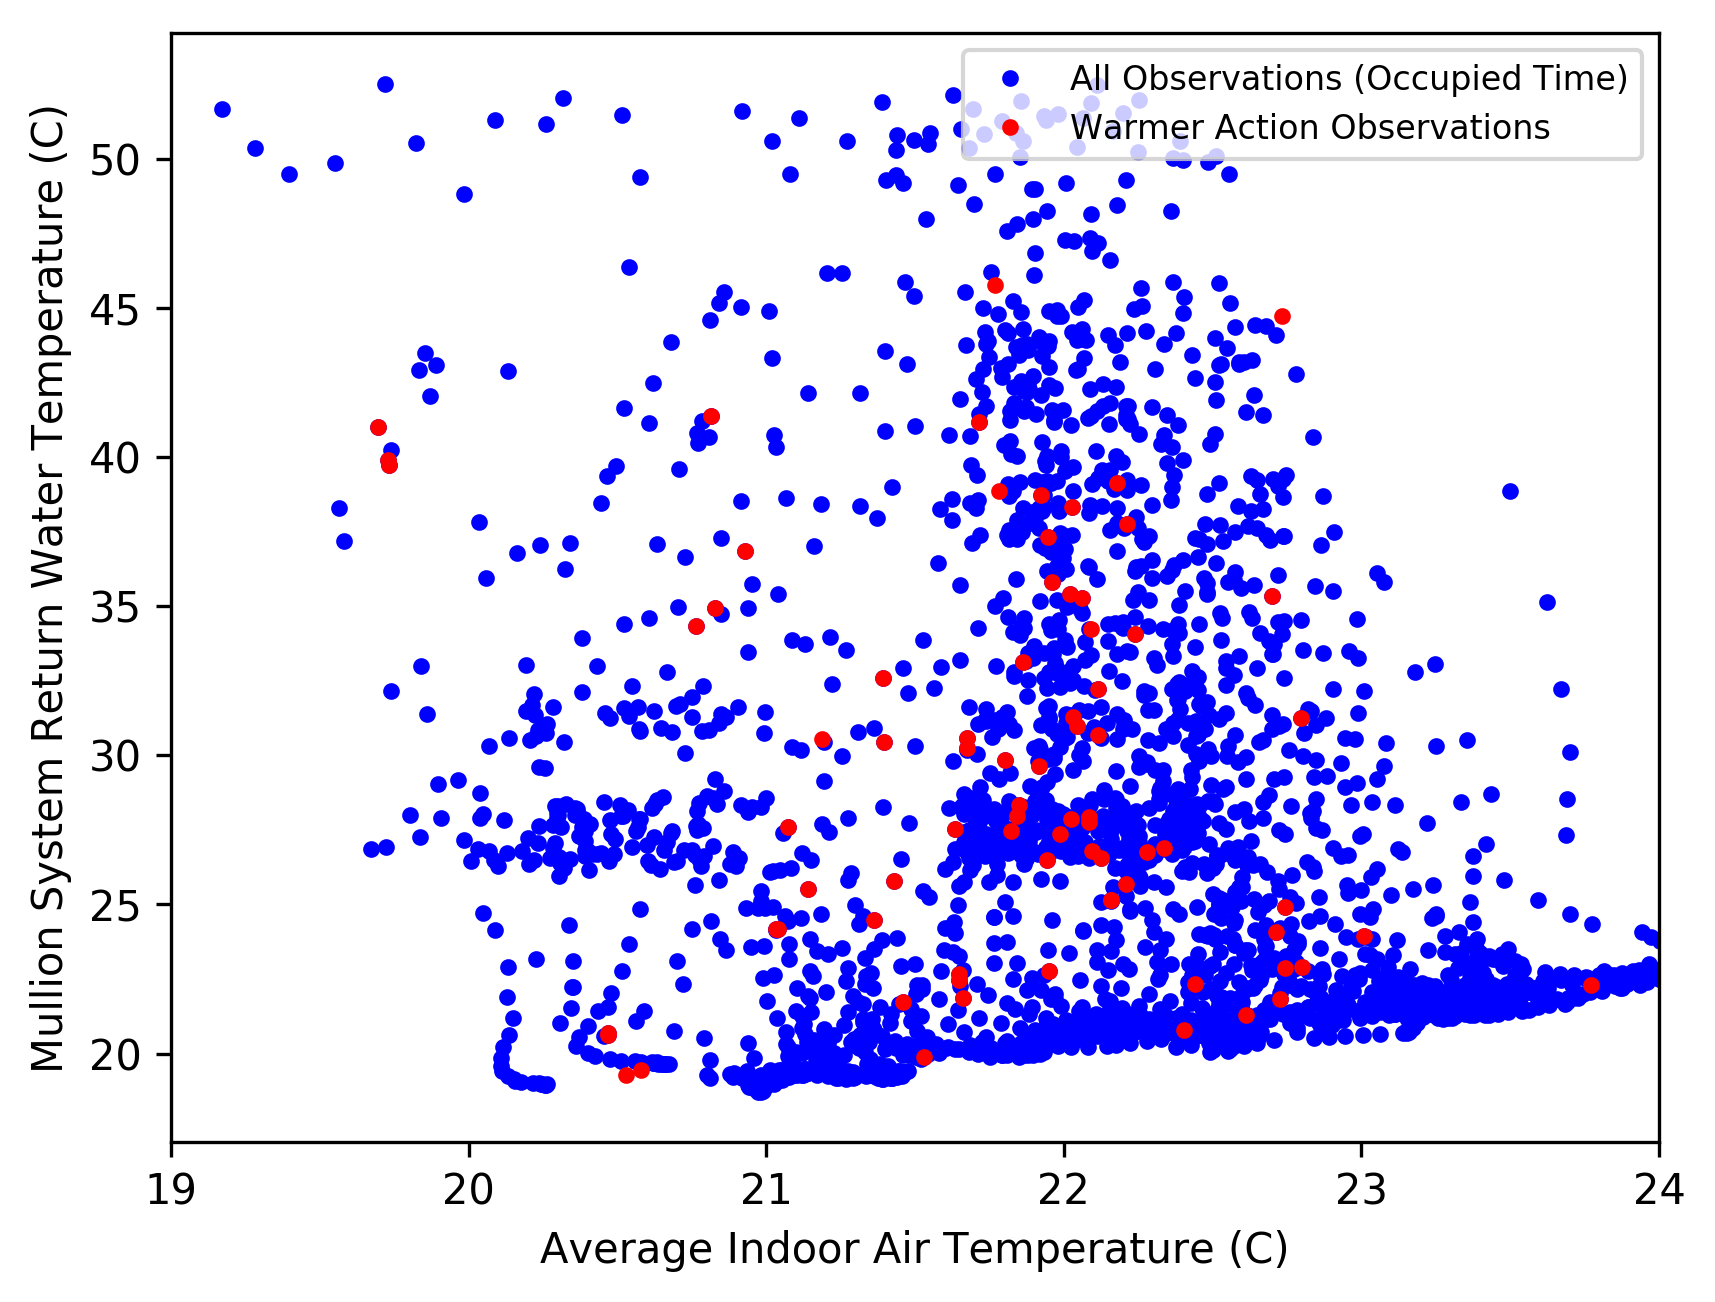

In [254]:
plt.plot(rlOb_all_occp['IAT C'], rlOb_all_occp['RWT'], '.', color = 'b', label = 'All Observations (Occupied Time)')
plt.plot(rlOb_warmVoteRows['IAT C'], rlOb_warmVoteRows['RWT'], '.', color = 'r', label = 'Warmer Action Observations')
plt.xlabel('Average Indoor Air Temperature (C)')
plt.ylabel('Mullion System Return Water Temperature (C)')
plt.legend(loc = 'upper right', fontsize = 8)
plt.xlim(19, 24)


In [466]:

       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       '', '',
       ''

IndentationError: unexpected indent (<ipython-input-466-d69a5592a475>, line 2)